# Introduction

# Importing libraries

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container{max-width:100%!important;width:auto!important;}</style>"))

In [2]:
%reload_ext autoreload
%autoreload 2

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xarray as xr
import pmdarima as pm
import warnings
warnings.filterwarnings('ignore')

from datetime import datetime as dt
from pylab import rcParams

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import grangercausalitytests
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

%matplotlib inline
sns.set()

# Importing data and Visualizing datasets:

In [4]:
def visualize_anomaly(data, x, y):
    plt.style.use("ggplot")
    fig, ax = plt.subplots(2,1, figsize = (13,8))
        
    ax[0].plot(data[y], color = 'black', linewidth = 0.5)
    ax[0].plot(data[y].rolling(12).mean(), color = 'red', linewidth = 2)
    ax[0].plot(data[y].rolling(120).mean(), color = 'gold', linewidth = 2)
    ax[0].legend(['Monthly', '1-Y Rolling Mean', '10-Y Rolling mean'])
    
    ax[0].set_ylabel("Anomaly", fontsize = 15)
    
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 15)
    
    #--------------------------------------------------------------#
    resample = data[y].resample('y').mean()
    
    colormat=np.where(resample > 0, 'purple','teal')
    ax[1].bar(pd.DatetimeIndex(resample.index).year, resample, color = colormat)
    
    plt.xticks(rotation=90, fontsize = 12)
    plt.yticks(rotation=90, fontsize = 15)

    plt.xlabel("Date", fontsize = 20)
    plt.ylabel("Anomaly", fontsize = 15)
    
    plt.show()

In [5]:
def visualize_gases(data, x, y):
    plt.style.use("ggplot")
    fig, ax = plt.subplots(2,1, figsize = (13,8))
        
    ax[0].plot(data[y], color = 'black', linewidth = 0.5)
    ax[0].plot(data[y].rolling(12).mean(), color = 'red', linewidth = 2)
    ax[0].plot(data[y].rolling(120).mean(), color = 'gold', linewidth = 2)
    ax[0].legend(['Monthly', '1-Y Rolling Mean', '10-Y Rolling mean'])
    
    ax[0].set_ylabel("Concentration (ppm/ppb/ppt)", fontsize = 15)
    
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 15)
    
    #--------------------------------------------------------------#
    resample = data[y].resample('y').mean()
    
    colormat=np.where(resample > 0, 'purple','teal')
    ax[1].bar(pd.DatetimeIndex(resample.index).year, resample, color = colormat)
    
    plt.xticks(rotation=90, fontsize = 12)
    plt.yticks(rotation=90, fontsize = 15)

    plt.xlabel("Date", fontsize = 20)
    plt.ylabel("(Concentration (ppm/ppb/ppt)", fontsize = 15)
    
    plt.show()

In [6]:
def visualize_monthly(data, x, y):
    fig,ax = plt.subplots(figsize = (13,5))
    ax.plot(data.groupby(pd.DatetimeIndex(data.index).month).mean())
    
    ax.set_xlabel("Date", fontsize = 12)
    ax.set_ylabel("Value", fontsize = 12)
    ax.set_xticks(np.arange(1, 13))
    ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 15)

    plt.show()

## Global land temperature

In [7]:
land_temp = pd.read_csv("C:/Users/johns/Downloads/Dissertation/Datasets/land_temperature.csv", parse_dates={'Date':['Year']}, index_col = 'Date')

land_temp.index = pd.to_datetime(land_temp.index, format='%Y%m', errors='ignore')
land_temp.rename(columns = {'Value': 'land_temp'}, inplace = True)
land_temp.head()

land_temp
Date                 
1880-01-01      -0.33
1880-02-01      -0.72
1880-03-01      -0.79
1880-04-01      -0.46
1880-05-01      -0.27

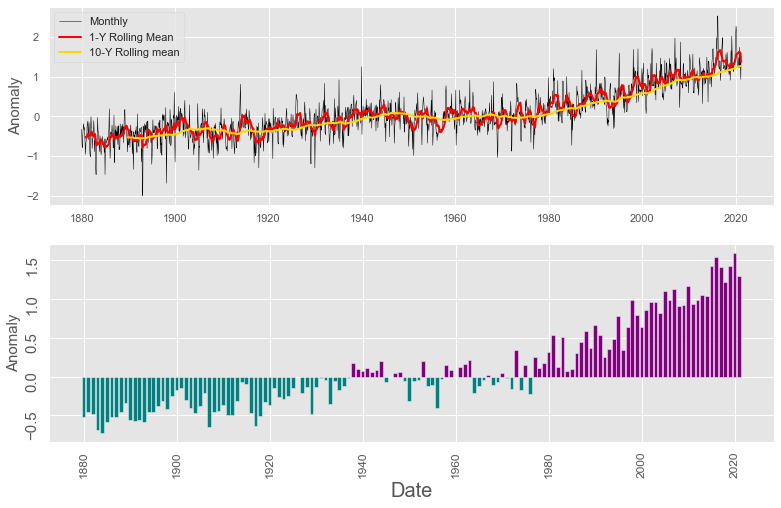

In [8]:
visualize_anomaly(land_temp, x = land_temp.index, y = 'land_temp')

## Global Ocean temperature

In [9]:
ocean_temp = pd.read_csv("C:/Users/johns/Downloads/Dissertation/Datasets/ocean_temperature.csv", parse_dates={'Date':['Year']}, index_col = 'Date')

ocean_temp.index = pd.to_datetime(ocean_temp.index, format='%Y%m', errors='ignore')
ocean_temp.rename(columns = {'Value': 'ocean_temp'}, inplace = True)
ocean_temp.head()

ocean_temp
Date                  
1880-01-01        0.01
1880-02-01        0.00
1880-03-01        0.08
1880-04-01        0.07
1880-05-01       -0.05

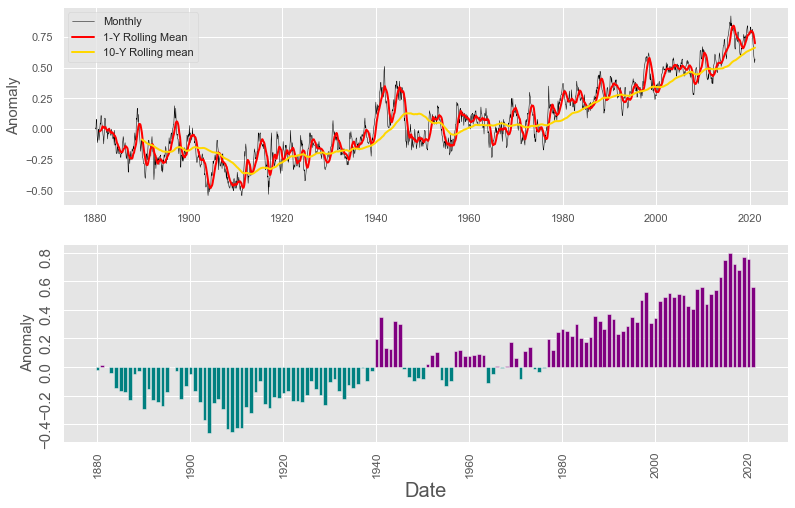

In [10]:
visualize_anomaly(ocean_temp, x = ocean_temp.index, y = 'ocean_temp')

## Global Air Temperature

In [11]:
air_temp = pd.read_csv("C:/Users/johns/Downloads/Datasets/global_air_temperature.csv",  parse_dates={'Date':['Year']}, index_col = 'Date')

air_temp = air_temp[air_temp['Source'] == 'GISTEMP']
air_temp = air_temp.drop(columns = ['Source'])
air_temp.rename(columns = {'Mean': 'air_temp'}, inplace = True)

air_temp = air_temp.resample('D').interpolate()
air_temp.head()

air_temp
Date                
1880-01-01 -0.200000
1880-01-02 -0.199781
1880-01-03 -0.199563
1880-01-04 -0.199344
1880-01-05 -0.199126

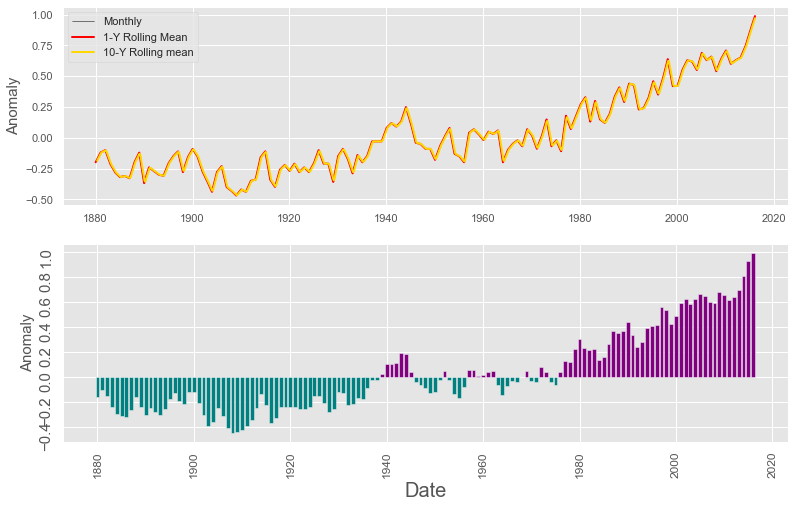

In [12]:
visualize_anomaly(air_temp, x = air_temp.index, y = 'air_temp')

## Northern Hemisphere land temperature

In [13]:
nh_land_temp = pd.read_csv("C:/Users/johns/Downloads/Dissertation/Datasets/nh_land_temp.csv", parse_dates={'Date':['Year']}, index_col = 'Date')

nh_land_temp.index = pd.to_datetime(nh_land_temp.index, format='%Y%m', errors='ignore')
nh_land_temp.rename(columns = {'Value': 'nh_land_temp'}, inplace = True)
nh_land_temp.head()

nh_land_temp
Date                    
1880-01-01         -0.23
1880-02-01         -0.83
1880-03-01         -0.91
1880-04-01         -0.43
1880-05-01         -0.17

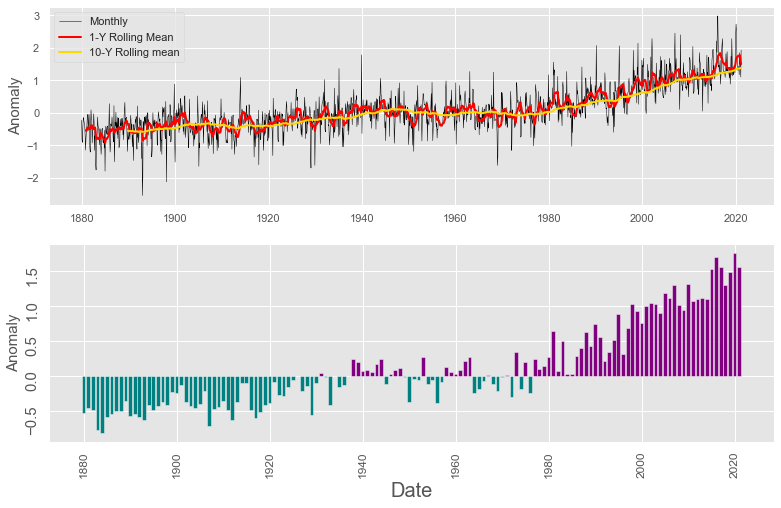

In [14]:
visualize_anomaly(nh_land_temp, x = nh_land_temp.index, y = 'nh_land_temp')

## Northern Hemisphere Ocean temperature

In [15]:
nh_ocean_temp = pd.read_csv("C:/Users/johns/Downloads/Dissertation/Datasets/nh_ocean_temp.csv", parse_dates={'Date':['Year']}, index_col = 'Date')

nh_ocean_temp.index = pd.to_datetime(nh_ocean_temp.index, format='%Y%m', errors='ignore')
nh_ocean_temp.rename(columns = {'Value': 'nh_ocean_temp'}, inplace = True)
nh_ocean_temp.head()

nh_ocean_temp
Date                     
1880-01-01          -0.09
1880-02-01          -0.05
1880-03-01           0.07
1880-04-01           0.14
1880-05-01           0.03

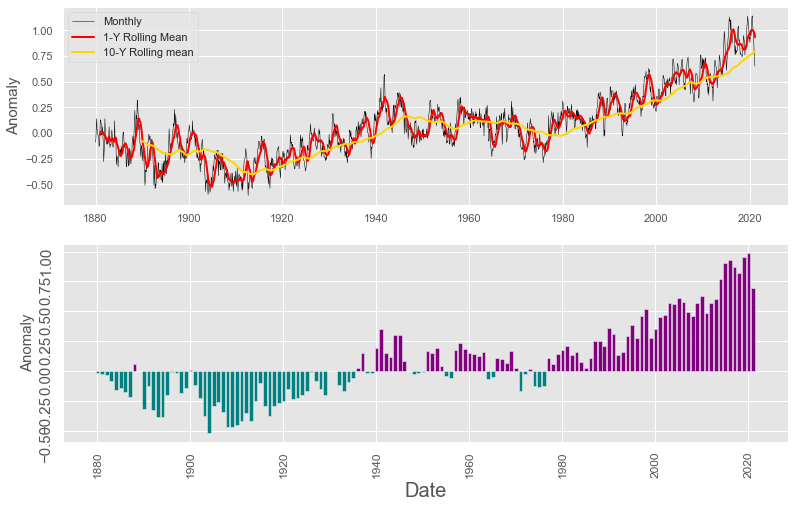

In [16]:
visualize_anomaly(nh_ocean_temp, x = nh_ocean_temp.index, y = 'nh_ocean_temp')

## Global Carbon Di Oxide (CO2) levels

In [17]:
co2_level = pd.read_csv("C:/Users/johns/Downloads/Dissertation/Datasets/Carbon Dioxide Emission.csv", parse_dates= {'Date':['Year', 'Month']}, index_col = 'Date')
#co2_level.index = pd.DatetimeIndex(gl_co2.index).year
co2_level = co2_level.drop(columns = ['Decimal_Date', 'Average', 'Trend', '#Days'], axis = 1)
co2_level.rename(columns = {'Interpolated':'CO2_level'}, inplace = True)

co2_level.head()

CO2_level
Date                 
1958-03-01     315.71
1958-04-01     317.45
1958-05-01     317.50
1958-06-01     317.10
1958-07-01     315.86

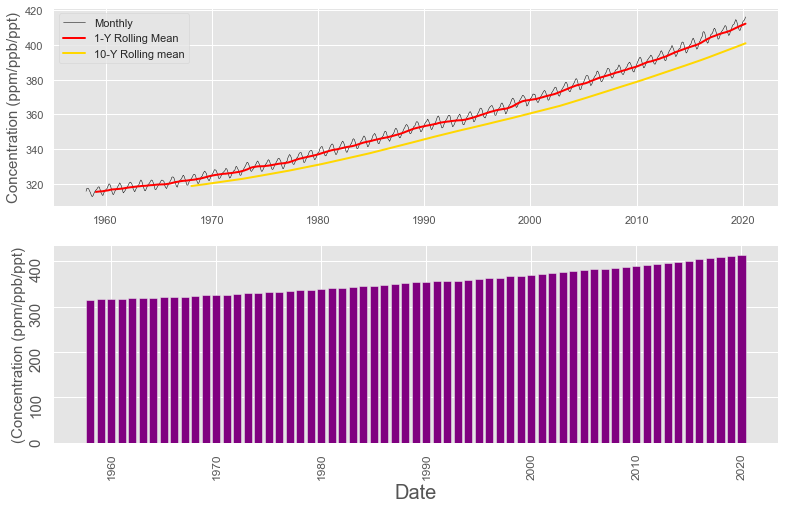

In [18]:
visualize_gases(co2_level, x = co2_level.index, y = 'CO2_level')

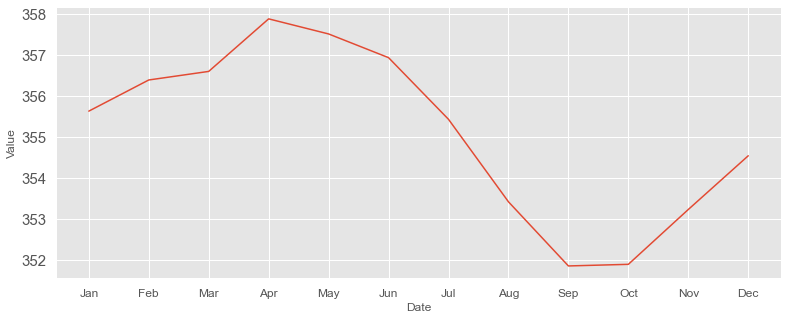

In [19]:
visualize_monthly(co2_level, co2_level.index, 'CO2_level')

## Global Nitrous Oxide (N2O) levels

In [20]:
n2o_level = pd.read_excel("C:/Users/johns/Downloads/Dissertation/Datasets/n2o.xlsx", parse_dates= {'Date':['year', 'month']}, index_col = 'Date')
n2o_level = n2o_level.drop(columns = ['decimal','average_unc', 'trend', 'trend_unc'])
n2o_level.rename(columns = {'average':'N2O_level'}, inplace = True)

n2o_level.head()

N2O_level
Date                 
2001-01-01      316.3
2001-02-01      316.3
2001-03-01      316.2
2001-04-01      316.1
2001-05-01      316.1

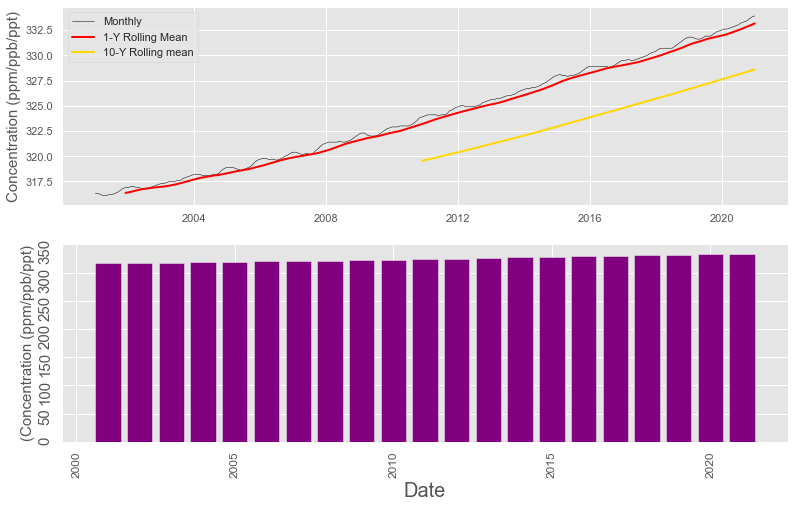

In [21]:
visualize_gases(n2o_level, x = n2o_level.index, y = 'N2O_level')

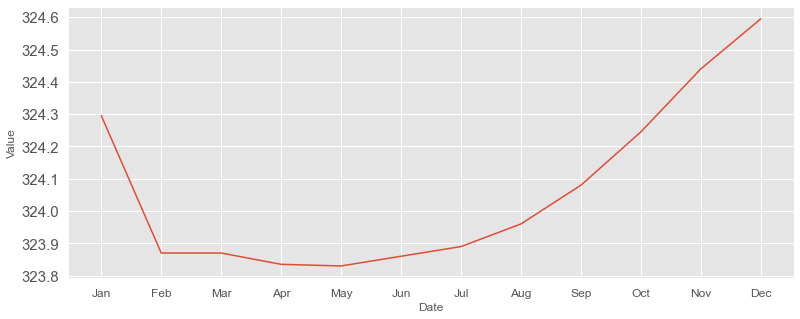

In [22]:
visualize_monthly(n2o_level, x = n2o_level.index, y = 'N2O_level')

## Global Sulphuric Hexa Flouride (SF6) levels

In [23]:
sf6_level = pd.read_excel("C:/Users/johns/Downloads/Dissertation/Datasets/sf6.xlsx", parse_dates= {'Date':['year', 'month']}, index_col = 'Date')
#co2_level.index = pd.DatetimeIndex(gl_co2.index).year
sf6_level = sf6_level.drop(columns = ['decimal', 'average_unc', 'trend', 'trend_unc'])
sf6_level.rename(columns = {'average':'SF6_level'}, inplace = True)

sf6_level.head()

SF6_level
Date                 
1997-07-01       4.00
1997-08-01       4.00
1997-09-01       4.02
1997-10-01       4.05
1997-11-01       4.08

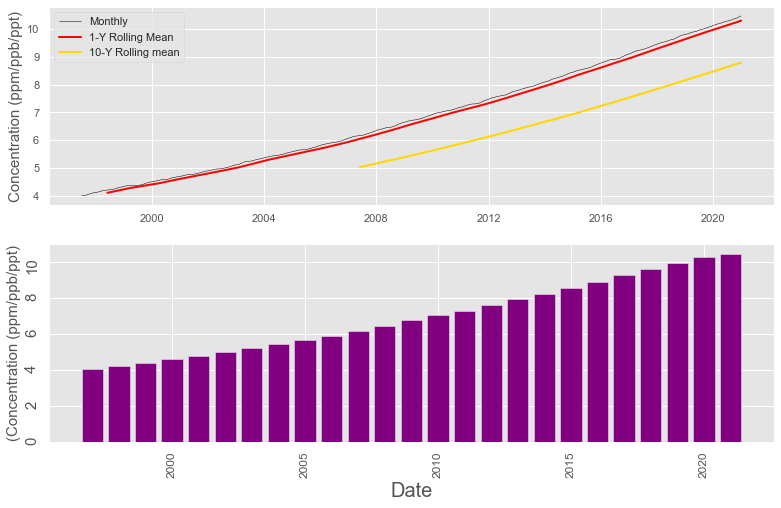

In [24]:
visualize_gases(sf6_level, x = sf6_level.index, y = 'SF6_level')

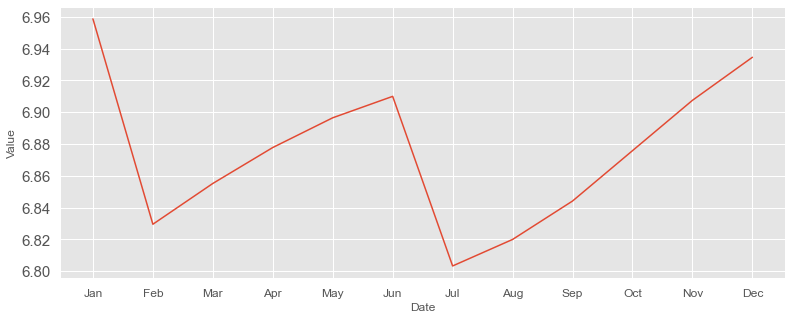

In [25]:
visualize_monthly(sf6_level, x = sf6_level.index, y = 'SF6_level')

## Global methane (CH4) levels

In [26]:
ch4_level = pd.read_excel("C:/Users/johns/Downloads/Dissertation/Datasets/methane.xlsx", parse_dates= {'Date':['year', 'month']}, index_col = 'Date')
#co2_level.index = pd.DatetimeIndex(gl_co2.index).year
ch4_level = ch4_level.drop(columns = ['decimal', 'average_unc', 'trend', 'trend_unc'])
ch4_level.rename(columns = {'average':'CH4_level'}, inplace = True)

ch4_level.head()

CH4_level
Date                 
1983-07-01     1625.4
1983-08-01     1627.4
1983-09-01     1638.1
1983-10-01     1644.7
1983-11-01     1642.3

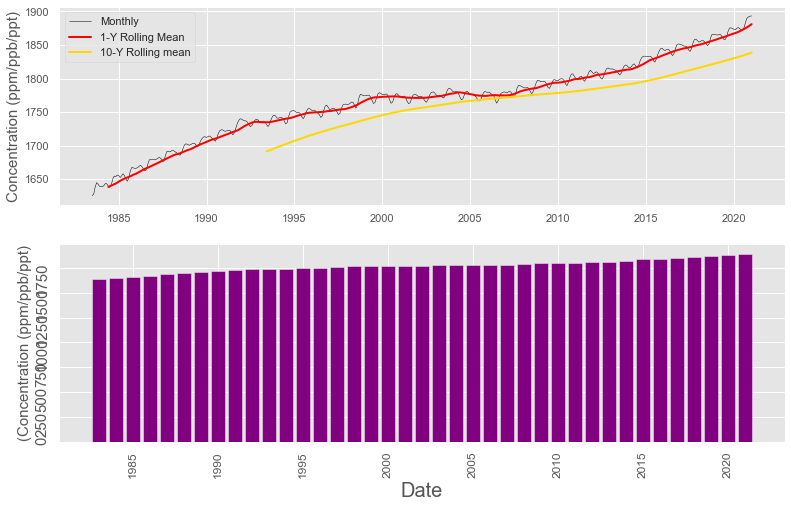

In [27]:
visualize_gases(ch4_level, x = ch4_level.index, y = 'CH4_level')

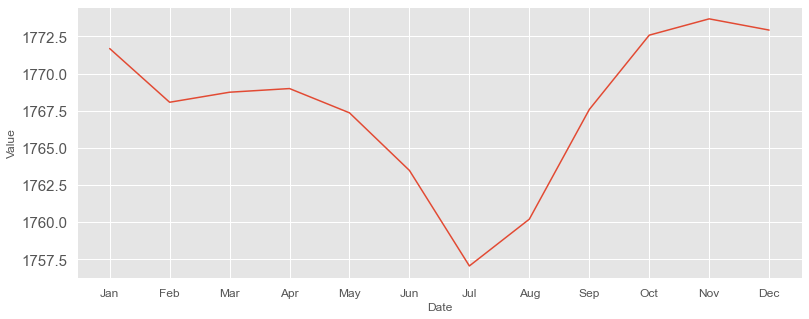

In [28]:
visualize_monthly(ch4_level, x = ch4_level.index, y = 'CH4_level')

## Global Precipitation levels

In [29]:
global_precip = pd.read_excel("C:/Users/johns/Downloads/Dissertation/Datasets/global_precipitation.xlsx", parse_dates={'Date':['Year']}, index_col = 'Date')

global_precip.index = pd.to_datetime(global_precip.index, format='%Y%m', errors='ignore')
global_precip.rename(columns= {'Anomaly ':'precip_anomaly'}, inplace = True)
global_precip.head()

precip_anomaly
Date                      
1901-01-01       -0.347421
1902-01-01       -1.917107
1903-01-01        0.782894
1904-01-01       -1.484036
1905-01-01       -0.372225

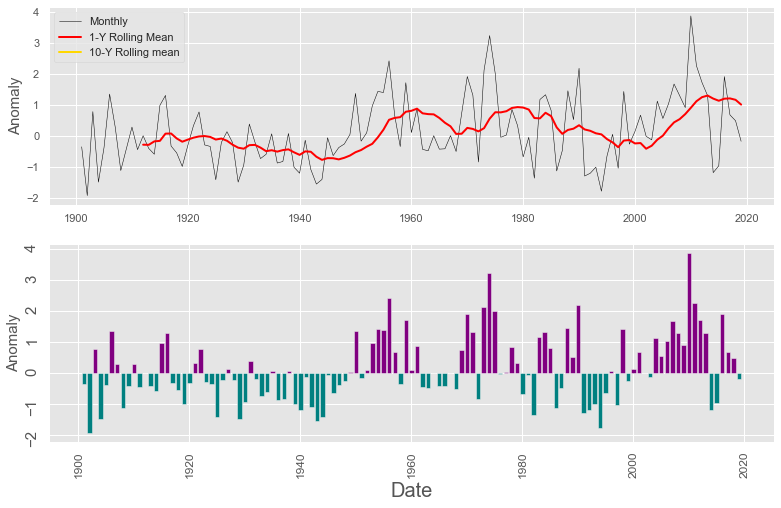

In [30]:
visualize_anomaly(global_precip, x = global_precip.index, y = 'precip_anomaly')

In [31]:
precip_ip = pd.DataFrame(global_precip.resample('d').mean().interpolate(method='linear'))
precip_ip

precip_anomaly
Date                      
1901-01-01       -0.347421
1901-01-02       -0.351722
1901-01-03       -0.356022
1901-01-04       -0.360323
1901-01-05       -0.364623
...                    ...
2018-12-28       -0.164972
2018-12-29       -0.166785
2018-12-30       -0.168598
2018-12-31       -0.170411
2019-01-01       -0.172225

[43100 rows x 1 columns]

## Ocean Heat Content

In [32]:
ohc = pd.read_excel("C:/Users/johns/Downloads/Dissertation/Datasets/ocean_heat_content.xlsx", parse_dates={'Date':['Year']}, index_col = 'Date')

ohc.index = pd.to_datetime(ohc.index, format='%Y%m', errors='ignore')
ohc.head()

CSIRO       IAP   MRI/JMA  NOAA
Date                                          
1955-01-01 -7.567433 -9.497333 -3.437233   NaN
1956-01-01 -6.933433 -7.897333 -2.844233   NaN
1957-01-01 -6.810433 -8.947333 -4.849233   NaN
1958-01-01 -2.275433 -5.707333 -1.769233   NaN
1959-01-01 -5.154433 -7.347333 -2.425233   NaN

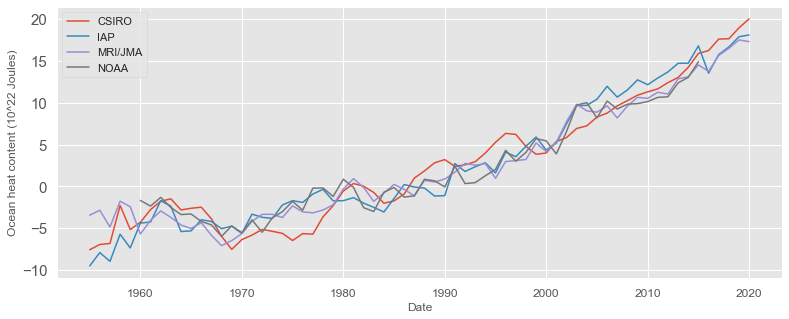

In [33]:
fig,ax = plt.subplots(figsize=(13,5))
ax.plot(ohc)

ax.set_xlabel("Date", fontsize = 12)
ax.set_ylabel("Ocean heat content (10^22 Joules)", fontsize = 12)
ax.legend(['CSIRO', 'IAP', 'MRI/JMA', 'NOAA'])

plt.xticks(fontsize = 12)
plt.yticks(fontsize = 15)

plt.show()

In [115]:
ohc_ip = pd.DataFrame(ohc['CSIRO'].resample('d').mean().interpolate(method = 'linear'))
ohc_ip.rename(columns={'CSIRO': 'ocean_heat_content'}, inplace = True)
ohc_ip.head()

ocean_heat_content
Date                          
1955-01-01           -7.567433
1955-01-02           -7.565696
1955-01-03           -7.563959
1955-01-04           -7.562222
1955-01-05           -7.560485

## EL Nino / Southern Oscillation Index (SOI)

In [35]:
soi = pd.read_excel("C:/Users/johns/Downloads/Dissertation/Datasets/elnino.xlsx", parse_dates=['Date'], index_col = 'Date')

soi.index = pd.to_datetime(soi.index, format='%Y%m', errors='ignore')
soi.rename(columns = {'Value': 'SOI'}, inplace = True)
soi.head()

SOI
Date           
1951-01-01  1.5
1951-02-01  0.9
1951-03-01 -0.1
1951-04-01 -0.3
1951-05-01 -0.7

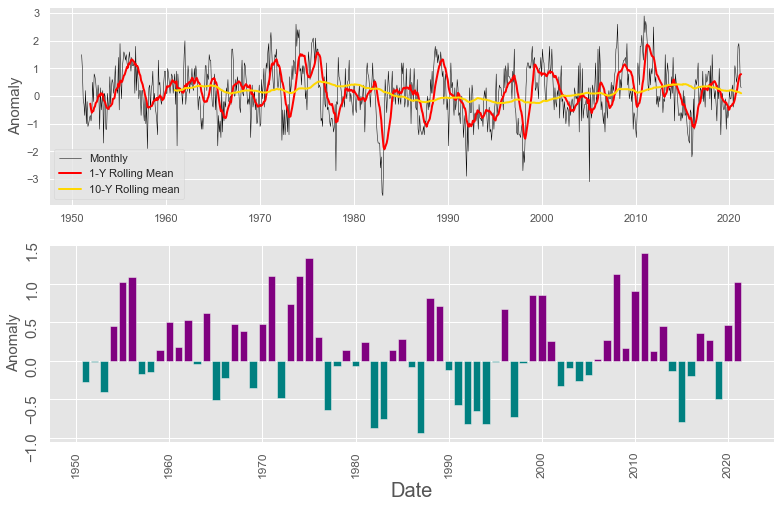

In [36]:
visualize_anomaly(soi, x = soi.index, y = 'SOI')

## Total Solar Irradiance

In [37]:
sol_data = 'C:/Users/johns/Downloads/Dissertation/Datasets/daily_solar_irrdiance/*.nc'
DS = xr.open_mfdataset(sol_data)
sol = DS.to_dataframe()

In [38]:
sol.time_bnds = pd.to_datetime(sol.time_bnds, format='%Y%m%d', errors='ignore')
sol.reset_index(level=[0,1], drop=True, inplace= True)
sol.rename(columns={'time_bnds': 'time'}, inplace=True)
sol.set_index('time', inplace=True)
sol.head()

TSI   TSI_UNC
time                             
1882-01-01  1360.807617  0.454469
1882-01-02  1360.843994  0.481399
1882-01-03  1360.739990  0.487415
1882-01-04  1360.852417  0.461263
1882-01-05  1360.623657  0.463177

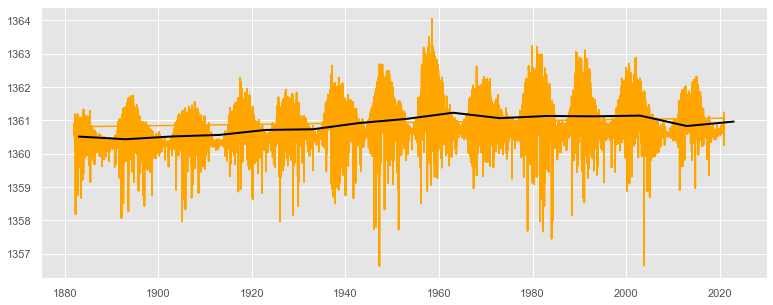

In [39]:
fig, ax = plt.subplots(figsize=(13,5))
ax.plot(sol.TSI, color = 'orange')
ax.plot(sol.TSI.resample('10y').mean(), color = 'black', linewidth = 2)

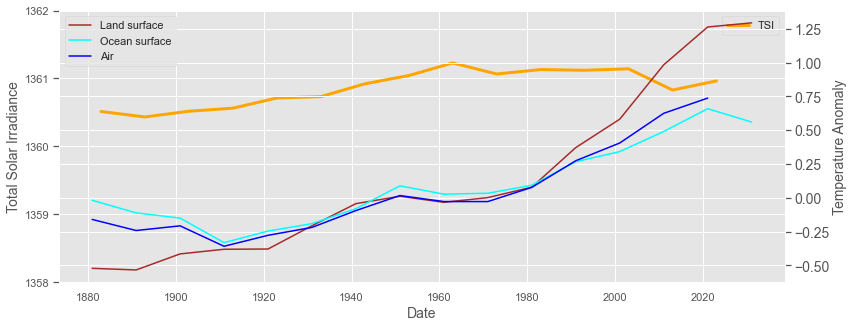

In [40]:
fig, ax = plt.subplots(figsize=(13,5))

ax.plot(sol.TSI.resample('10y').mean(), color='orange', linewidth =3)
ax.set_xlabel("Date", fontsize = 14)
ax.set_ylabel("Total Solar Irradiance", fontsize = 14)
ax.set_yticks(np.arange(1358, 1363))
ax.legend(['TSI'])

ax2 = ax.twinx()
ax2.plot(land_temp.resample('10y').mean(), color = 'brown')
ax2.plot(ocean_temp.resample('10y').mean(), color = 'aqua')
ax2.plot(air_temp.resample('10y').mean(), color = 'blue')

ax2.set_ylabel("Temperature Anomaly",fontsize=14)
ax2.legend(['Land surface', 'Ocean surface', 'Air'])

plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

plt.show()

## Greenland's Ice mass (Gigatonnes)

In [41]:
imb = pd.read_excel("C:/Users/johns/Downloads/Dissertation/Datasets/Ice_mass_balance.xlsx", parse_dates=['Date'])

imb['Date'] = pd.to_datetime(imb['Date'].dt.strftime('%Y-%m'))
imb.set_index('Date', inplace =True)
imb.drop('Year', axis = 1, inplace = True)

In [42]:
imb['NASA - Greenland land ice mass'] = imb['NASA - Greenland land ice mass'].interpolate(method='linear')
imb['IMBIE - Greenland cumulative ice mass change'] = imb['IMBIE - Greenland cumulative ice mass change'].interpolate(method='linear')
imb['IMBIE - Antarctica cumulative ice mass change'] = imb['IMBIE - Antarctica cumulative ice mass change'].interpolate(method='linear')

imb.head()

NASA - Greenland land ice mass  \
Date                                         
1992-01-01                      395.365526   
1992-02-01                      401.965526   
1992-03-01                      408.565526   
1992-04-01                      415.165526   
1992-05-01                      421.765526   

            IMBIE - Antarctica cumulative ice mass change  \
Date                                                        
1992-01-01                                     418.310350   
1992-02-01                                     425.377021   
1992-03-01                                     433.552016   
1992-04-01                                     424.496837   
1992-05-01                                     423.362721   

            IMBIE - Greenland cumulative ice mass change  
Date                                                      
1992-01-01                                    395.365526  
1992-02-01                                    401.965526  
1992-03-01                                    408.565526  
1992-04-01                                    415.165526  
1992-05-01                                    421.765526

In [43]:
# Average of both NASA and IMBIE organisation's Greenland cumulative ice mass changes
imb['Avg-Greenland ice mass change'] = imb[['NASA - Greenland land ice mass', 'IMBIE - Greenland cumulative ice mass change']].mean(axis=1)

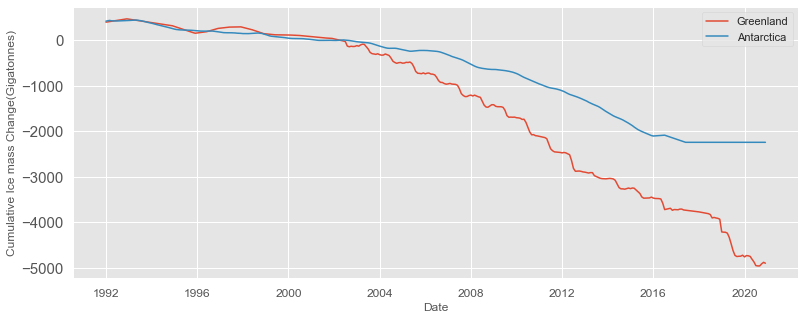

In [44]:
fig,ax = plt.subplots(figsize=(13,5))
ax.plot(imb['Avg-Greenland ice mass change'])
ax.plot(imb['IMBIE - Antarctica cumulative ice mass change'])

ax.set_xlabel("Date", fontsize = 12)
ax.set_ylabel('Cumulative Ice mass Change(Gigatonnes)', fontsize = 12)
ax.legend(['Greenland', 'Antarctica'])

plt.xticks(fontsize = 12)
plt.yticks(fontsize = 15)

plt.show()

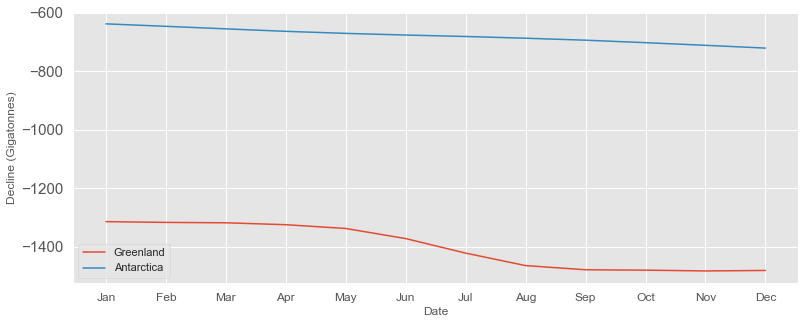

In [45]:
fig,ax = plt.subplots(figsize=(13,5))

ax.plot(imb['Avg-Greenland ice mass change'].groupby(pd.DatetimeIndex(imb.index).month).mean())
ax.plot(imb['IMBIE - Antarctica cumulative ice mass change'].groupby(pd.DatetimeIndex(imb.index).month).mean())

ax.set_xlabel("Date", fontsize = 12)
ax.set_ylabel("Decline (Gigatonnes)", fontsize = 12)
ax.legend(['Greenland', 'Antarctica'])
ax.set_xticks(np.arange(1, 13))
ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

plt.xticks(fontsize = 12)
plt.yticks(fontsize = 15)

plt.show()

## Greenland Blocking Index

In [46]:
GBI = pd.read_excel("C:/Users/johns/Downloads/Dissertation/Datasets/GBI.xlsx", parse_dates= {'Date':['year', 'month','day']}, index_col = 'Date')
GBI.head()

GBI
Date               
1948-01-01  5169.27
1948-01-02  5141.54
1948-01-03  5124.00
1948-01-04  5106.83
1948-01-05  5083.19

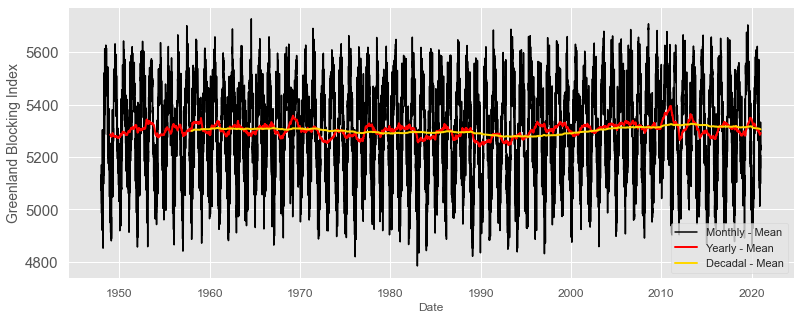

In [47]:
fig,ax = plt.subplots(figsize=(13,5))
ax.plot(GBI['GBI'], color = 'black')
ax.plot(GBI.rolling(365).mean(), color = 'red', linewidth = 2)
ax.plot(GBI.rolling(3652).mean(), color = 'gold', linewidth = 2)

ax.set_xlabel("Date", fontsize = 12)
ax.set_ylabel('Greenland Blocking Index', fontsize = 14)
ax.legend(['Monthly - Mean', 'Yearly - Mean', 'Decadal - Mean'])

plt.xticks(fontsize = 12)
plt.yticks(fontsize = 15)

plt.show()

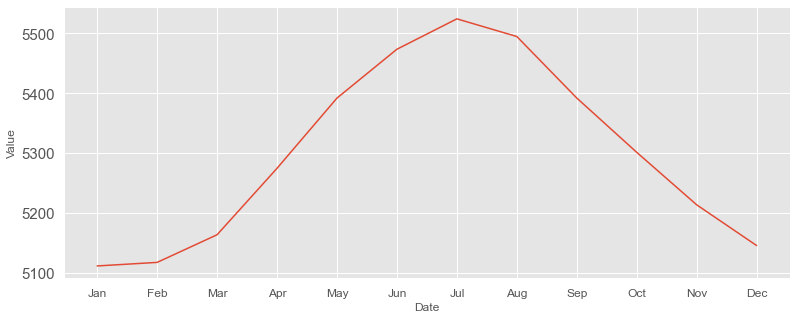

In [48]:
visualize_monthly(GBI, x = GBI.index, y = 'GBI')

## Arctic Oscillation Index

In [49]:
AOI = pd.read_excel("C:/Users/johns/Downloads/Dissertation/Datasets/AOI.xlsx", parse_dates= {'Date':['Year', 'month']}, index_col='Date')
#AOI = AOI.melt(id_vars=['Date'], var_name="month", value_name="AOI")
AOI.rename(columns = {'Value': 'AOI'}, inplace = True)

In [50]:
AOI

AOI
Date             
1950-01-01 -0.060
1950-02-01  0.627
1950-03-01 -0.008
1950-04-01  0.555
1950-05-01  0.072
...           ...
2020-08-01 -0.381
2020-09-01  0.631
2020-10-01 -0.072
2020-11-01  2.086
2020-12-01 -1.736

[852 rows x 1 columns]

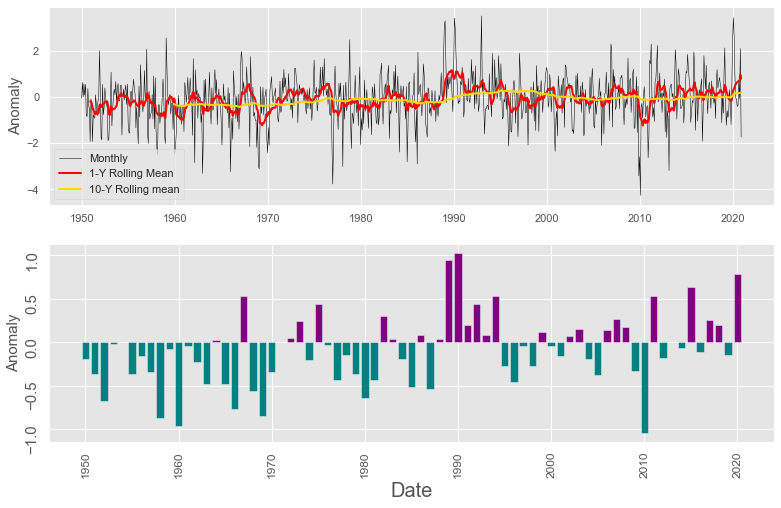

In [51]:
visualize_anomaly(AOI, x = AOI.index, y = 'AOI')

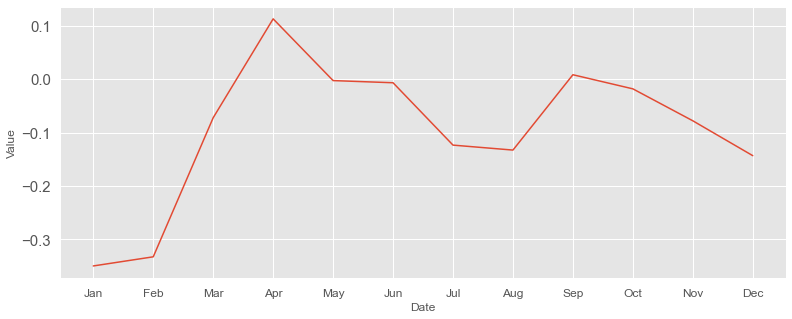

In [52]:
visualize_monthly(AOI, AOI.index, 'AOI')

## Sea Ice Extent

In [53]:
sea_ice = pd.read_excel("C:/Users/johns/Downloads/Dissertation/Datasets/sea ice extent.xlsx", parse_dates= {'Date': ['Year', 'month']}, index_col = 'Date')

sea_ice.index = pd.to_datetime(sea_ice.index, format='%Y%m', errors='ignore')
sea_ice.head()

Seas_of_Japan  BeringSea  HudsonBay  BaffinBay  Greenland_Sea  \
Date                                                                        
1978-11-01          68939      72660     842977     759680         658919   
1978-12-01         538911     255117    1233464     929046         912035   
1979-01-01        1334118     333220    1233464    1091576        1085606   
1979-02-01        1491727     554652    1233464    1158329        1115438   
1979-03-01        1560036     649657    1233464    1300266        1048558   

            Kara_Barents_Seas  Arctic_Ocean  Canadian_Archipelago  \
Date                                                                
1978-11-01            1455158       7057024                750859   
1978-12-01            1820160       7152365                750859   
1979-01-01            2042890       7158168                750859   
1979-02-01            2146929       7158209                750859   
1979-03-01            2145609       7158209                750859   

            Gulf_of_Saint_Lawrence     Total  
Date                                          
1978-11-01                   32287  11698504  
1978-12-01                   47914  13639870  
1979-01-01                  142092  15171993  
1979-02-01                  218597  15828204  
1979-03-01                  207264  16053921

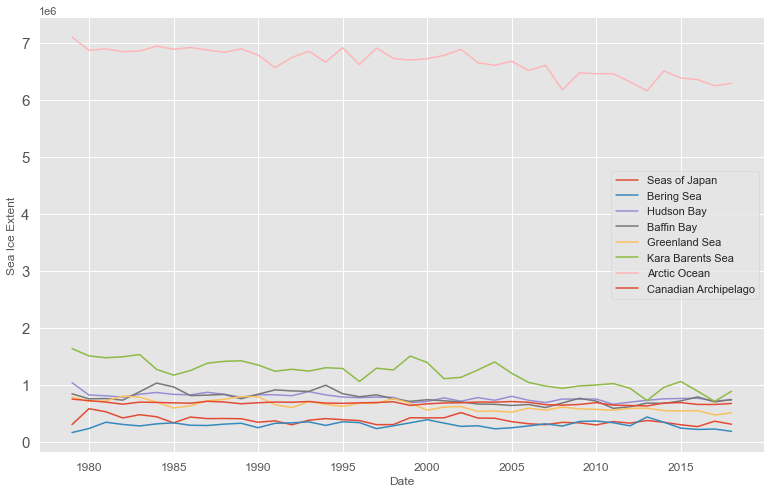

In [54]:
fig,ax = plt.subplots(figsize=(13,8))
ax.plot(sea_ice.iloc[:, :-2].resample('y').mean())

ax.set_xlabel("Date", fontsize = 12)
ax.set_ylabel("Sea Ice Extent", fontsize = 12)
ax.legend(['Seas of Japan', 'Bering Sea', 'Hudson Bay', 'Baffin Bay', 'Greenland Sea', 'Kara Barents Sea', 'Arctic Ocean', 'Canadian Archipelago', 'Gulf of Saint Lawrence'])

plt.xticks(fontsize = 12)
plt.yticks(fontsize = 15)

plt.show()

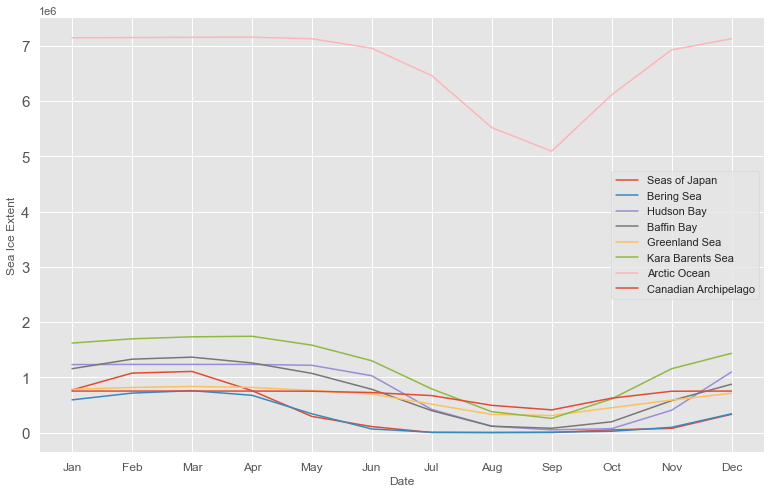

In [55]:
fig,ax = plt.subplots(figsize=(13,8))
ax.plot(sea_ice.iloc[:, :-2].groupby(pd.DatetimeIndex(sea_ice.index).month).mean())

ax.set_xlabel("Date", fontsize = 12)
ax.set_ylabel("Sea Ice Extent", fontsize = 12)
ax.legend(['Seas of Japan', 'Bering Sea', 'Hudson Bay', 'Baffin Bay', 'Greenland Sea', 'Kara Barents Sea', 'Arctic Ocean', 'Canadian Archipelago', 'Gulf of Saint Lawrence'])
ax.set_xticks(np.arange(1, 13))
ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

plt.xticks(fontsize = 12)
plt.yticks(fontsize = 15)

plt.show()

## Global Mean Sea Level Rise

In [56]:
gmsl = pd.read_excel("C:/Users/johns/Downloads/Dissertation/Datasets/sea_level.xlsx", parse_dates= {'Date': ['Year']}, index_col = 'Date')
gmsl.head()

CSIRO - Adjusted sea level (inches)  \
Date                                              
1880-01-01                             0.000000   
1881-01-01                             0.220472   
1882-01-01                            -0.440945   
1883-01-01                            -0.232283   
1884-01-01                             0.590551   

            CSIRO - Lower error bound (inches)  \
Date                                             
1880-01-01                           -0.952756   
1881-01-01                           -0.732283   
1882-01-01                           -1.346457   
1883-01-01                           -1.129921   
1884-01-01                           -0.283465   

            CSIRO - Upper error bound (inches)  \
Date                                             
1880-01-01                            0.952756   
1881-01-01                            1.173228   
1882-01-01                            0.464567   
1883-01-01                            0.665354   
1884-01-01                            1.464567   

            NOAA - Adjusted sea level (inches)  
Date                                            
1880-01-01                                 NaN  
1881-01-01                                 NaN  
1882-01-01                                 NaN  
1883-01-01                                 NaN  
1884-01-01                                 NaN

In [57]:
gmsl_ip = gmsl.resample('d').mean().interpolate(method='linear')

In [58]:
# Average rise in sea level between 1880 & 1980

avg = np.mean(gmsl[(gmsl.index >= '1880') & (gmsl.index <= '2000')]['CSIRO - Adjusted sea level (inches)'])
avg

3.1591071745123966

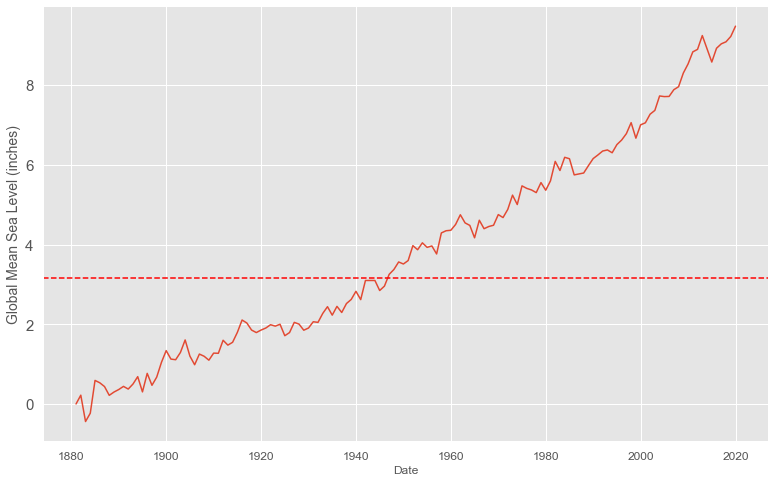

In [59]:
fig,ax = plt.subplots(figsize=(13,8))
ax.plot(gmsl['CSIRO - Adjusted sea level (inches)'].resample('y').mean())

ax.set_xlabel("Date", fontsize = 12)
ax.set_ylabel('Global Mean Sea Level (inches)', fontsize = 14)

plt.axhline(y=avg, label='Average Global Sea Rise', linestyle='--', color = 'red')
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 15)

plt.show()

# Data Preparation & Exploratory Data Analysis:

In [60]:
# Merging required variables (granularity = monthly) into a one mega dataset for Time Series Analysis:

df = land_temp.merge(ocean_temp, how='inner', on='Date') \
    .merge(air_temp, how = 'inner', on = 'Date') \
    .merge(nh_land_temp, how = 'inner', on = 'Date') \
    .merge(nh_ocean_temp, how = 'inner', on = 'Date') \
    .merge(co2_level, how='inner', on='Date') \
    .merge(sf6_level, how = 'inner', on = 'Date') \
    .merge(ch4_level, how='inner', on = 'Date') \
    .merge(n2o_level, how='inner', on = 'Date') \
    .merge(imb['NASA - Greenland land ice mass'], how = 'inner', on = 'Date') \
    .merge(sea_ice, how='inner', on='Date') \
    .merge(soi, how = 'inner', on = 'Date') \
    .merge(AOI, how = 'inner', on = 'Date') \
    .merge(GBI, how = 'inner', on = 'Date') 

In [61]:
# Resampling the main dataset to daily granularity and interpolating the gaps with linear method:

df = df.resample('D').mean().interpolate(method = 'linear')

In [62]:
# Merging variables (granularity = yearly) interpolated to daily data, into one dataset for time series analysis:

df = df.merge(precip_ip, how = 'inner', on = 'Date') \
    .merge(ohc_ip, how = 'inner', on = 'Date') \
    .merge(gmsl_ip['CSIRO - Adjusted sea level (inches)'], how = 'inner', on = 'Date')

In [63]:
df.head()

land_temp  ocean_temp  air_temp  nh_land_temp  nh_ocean_temp  \
Date                                                                       
2001-01-01   0.750000    0.360000  0.550000      0.830000       0.290000   
2001-01-02   0.742903    0.360323  0.550219      0.819355       0.291290   
2001-01-03   0.735806    0.360645  0.550438      0.808710       0.292581   
2001-01-04   0.728710    0.360968  0.550658      0.798065       0.293871   
2001-01-05   0.721613    0.361290  0.550877      0.787419       0.295161   

             CO2_level  SF6_level    CH4_level  N2O_level  \
Date                                                        
2001-01-01  370.590000   4.690000  1772.800000      316.3   
2001-01-02  370.619677   4.690645  1772.787097      316.3   
2001-01-03  370.649355   4.691290  1772.774194      316.3   
2001-01-04  370.679032   4.691935  1772.761290      316.3   
2001-01-05  370.708710   4.692581  1772.748387      316.3   

            NASA - Greenland land ice mass  ...  Arctic_Ocean  \
Date                                        ...                 
2001-01-01                       76.576115  ...  7.155309e+06   
2001-01-02                       76.431928  ...  7.154979e+06   
2001-01-03                       76.287740  ...  7.154649e+06   
2001-01-04                       76.143553  ...  7.154320e+06   
2001-01-05                       75.999365  ...  7.153990e+06   

            Canadian_Archipelago  Gulf_of_Saint_Lawrence         Total  \
Date                                                                     
2001-01-01              750859.0            72838.000000  1.409742e+07   
2001-01-02              750859.0            76139.193548  1.412708e+07   
2001-01-03              750859.0            79440.387097  1.415674e+07   
2001-01-04              750859.0            82741.580645  1.418639e+07   
2001-01-05              750859.0            86042.774194  1.421605e+07   

                 SOI       AOI          GBI  precip_anomaly  \
Date                                                          
2001-01-01  1.000000 -0.959000  5108.500000        0.668327   
2001-01-02  1.022581 -0.948129  5109.902903        0.666469   
2001-01-03  1.045161 -0.937258  5111.305806        0.664610   
2001-01-04  1.067742 -0.926387  5112.708710        0.662752   
2001-01-05  1.090323 -0.915516  5114.111613        0.660893   

            ocean_heat_content  CSIRO - Adjusted sea level (inches)  
Date                                                                 
2001-01-01            5.370667                             7.271654  
2001-01-02            5.371927                             7.271912  
2001-01-03            5.373187                             7.272171  
2001-01-04            5.374447                             7.272430  
2001-01-05            5.375708                             7.272689  

[5 rows x 26 columns]

## Correlation Matrix

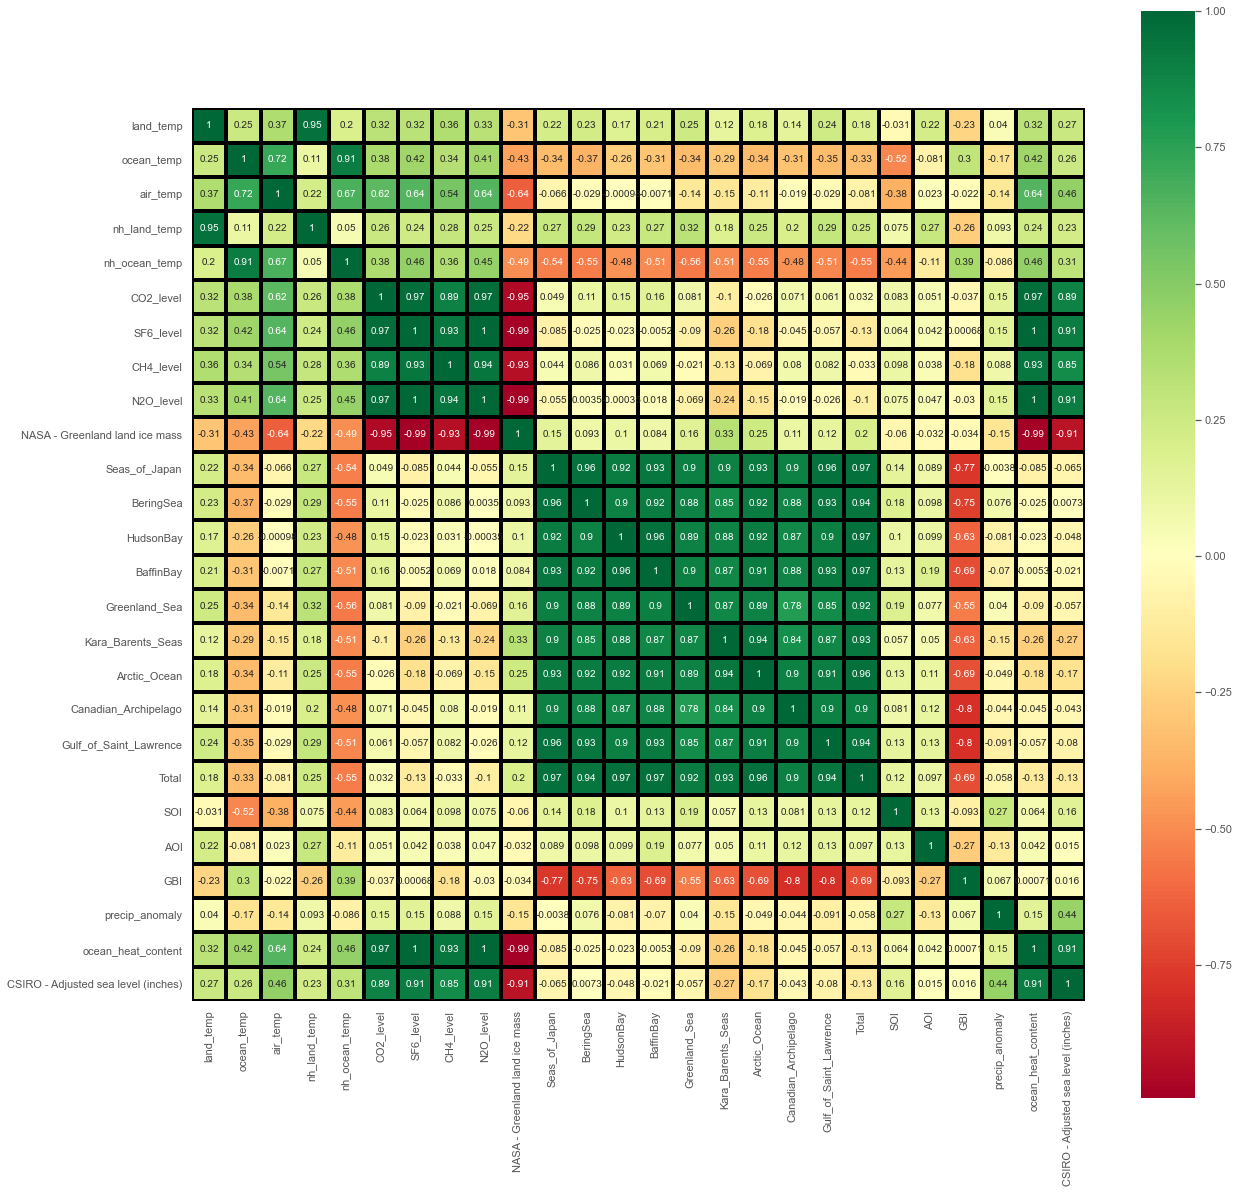

In [64]:
fig,ax = plt.subplots(figsize=(20,20))
corr_map = sns.heatmap(df.corr(method='spearman'), cmap = 'RdYlGn', annot = True,square=True, linewidths=3, linecolor='black')

## Granger's Causation Test

In [65]:
maxlag=12
#test = 'ssr_chi2test'

def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):  
    
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    
    """
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

In [66]:
grangers_causation_matrix(df, variables = df.columns)

land_temp_x  ocean_temp_x  air_temp_x  \
land_temp_y                                 1.0000        0.0001      0.0000   
ocean_temp_y                                0.0763        1.0000      0.0000   
air_temp_y                                  0.0000        0.0000      1.0000   
nh_land_temp_y                              0.0600        0.0648      0.0003   
nh_ocean_temp_y                             0.0001        0.0000      0.0000   
CO2_level_y                                 0.0000        0.0000      0.0541   
SF6_level_y                                 0.0000        0.0000      0.7332   
CH4_level_y                                 0.0000        0.0000      0.0228   
N2O_level_y                                 0.0040        0.0043      0.4963   
NASA - Greenland land ice mass_y            0.0000        0.0000      0.0000   
Seas_of_Japan_y                             0.0000        0.0002      0.0007   
BeringSea_y                                 0.1355        0.0000      0.0455   
HudsonBay_y                                 0.0000        0.0000      0.0083   
BaffinBay_y                                 0.0000        0.0000      0.0030   
Greenland_Sea_y                             0.0000        0.0000      0.0647   
Kara_Barents_Seas_y                         0.0000        0.0000      0.0438   
Arctic_Ocean_y                              0.0000        0.0000      0.1750   
Canadian_Archipelago_y                      0.0000        0.0000      0.2752   
Gulf_of_Saint_Lawrence_y                    0.0558        0.0000      0.7966   
Total_y                                     0.0000        0.0000      0.0082   
SOI_y                                       0.0567        0.0000      0.0001   
AOI_y                                       0.0000        0.0104      0.0127   
GBI_y                                       0.4907        0.0000      0.0002   
precip_anomaly_y                            0.0000        0.0000      0.0000   
ocean_heat_content_y                        0.0000        0.0000      0.2106   
CSIRO - Adjusted sea level (inches)_y       0.1731        0.0001      0.0000   

                                       nh_land_temp_x  nh_ocean_temp_x  \
land_temp_y                                    0.0474           0.0004   
ocean_temp_y                                   0.0592           0.0000   
air_temp_y                                     0.0000           0.0000   
nh_land_temp_y                                 1.0000           0.0212   
nh_ocean_temp_y                                0.0424           1.0000   
CO2_level_y                                    0.0000           0.0000   
SF6_level_y                                    0.0032           0.0230   
CH4_level_y                                    0.0000           0.0000   
N2O_level_y                                    0.0000           0.0000   
NASA - Greenland land ice mass_y               0.0000           0.0000   
Seas_of_Japan_y                                0.0000           0.0000   
BeringSea_y                                    0.0078           0.0596   
HudsonBay_y                                    0.0000           0.0000   
BaffinBay_y                                    0.0000           0.0000   
Greenland_Sea_y                                0.0000           0.0000   
Kara_Barents_Seas_y                            0.0000           0.0002   
Arctic_Ocean_y                                 0.0000           0.0000   
Canadian_Archipelago_y                         0.0000           0.0058   
Gulf_of_Saint_Lawrence_y                       0.0092           0.0028   
Total_y                                        0.0000           0.0004   
SOI_y                                          0.1262           0.0002   
AOI_y                                          0.0000           0.1405   
GBI_y                                          0.0340           0.0000   
precip_anomaly_y                               0.0000           0.0000   
ocean_heat_content_y        

# Machine Learning Modeling

In [67]:
def accuracy(actual, predict):
    error = abs(actual - predict)
    mae = np.mean(error)                                   # Avg(Abs(Actual — Forecast))
    rmse = np.sqrt(np.mean(error**2))                      # Sqrt(Avg(Power(Actual - Forecast)))
    mape = np.mean((error / abs(actual))) * 100            # Avg(Abs(Actual-Forecast)/Abs(Actual)) *100
    accuracy = 100 - mape
    
    print('Mean Absolute Error: ', mae)
    print('Root Mean Squared Error: ', rmse)
    print('Mean Absolute Percentage Error: ', mape)
    print('Accuracy : ', accuracy)

## Prediction of Greenland's Ice Mass

### Feature Selection

In [68]:
GRIM_X = df[['land_temp', 'ocean_temp', 'air_temp', 'nh_land_temp', 'nh_ocean_temp',
        'CO2_level', 'SF6_level', 'CH4_level', 'N2O_level',
        'Seas_of_Japan', 'BeringSea','HudsonBay', 'BaffinBay', 'Greenland_Sea',
        'Kara_Barents_Seas','Arctic_Ocean', 'Canadian_Archipelago', 
        'Gulf_of_Saint_Lawrence','Total', 'precip_anomaly', 
        'ocean_heat_content', 'CSIRO - Adjusted sea level (inches)']]

GRIM_Y = df[['NASA - Greenland land ice mass']]

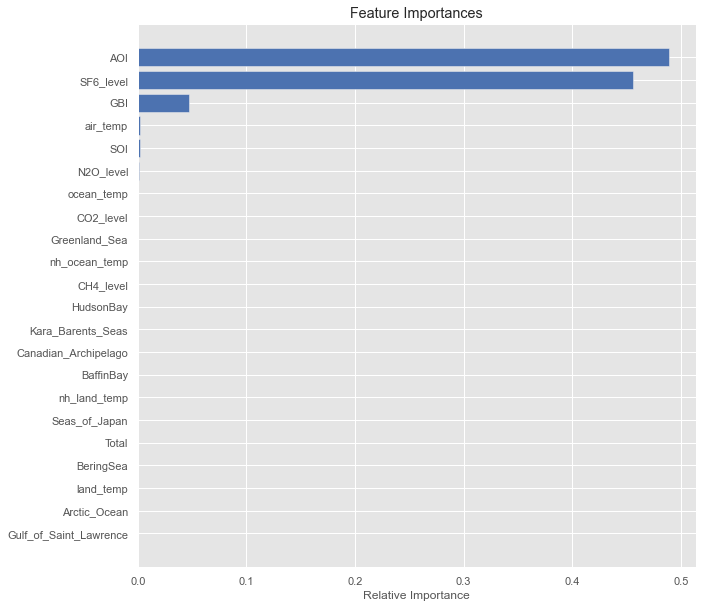

In [69]:
# fitting the model
model = RandomForestRegressor(n_estimators=500, n_jobs=-1, random_state=42)
model.fit(GRIM_X, GRIM_Y)

# plotting feature importances
features = df.drop('NASA - Greenland land ice mass', axis=1).columns
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [70]:
def GRIM(regressor):
    
   # Feature Selection:
    
    X = df[['CH4_level','N2O_level','CO2_level', 'SF6_level', 'ocean_heat_content','CSIRO - Adjusted sea level (inches)', 'AOI', 'GBI', 'SOI']]
    Y = df[['NASA - Greenland land ice mass']]
    
    # Spliting time series data:
    
    x_train = X[X.index < '2014'].values
    y_train = Y[Y.index < '2014'].values
    x_test = X[X.index >= '2014'].values
    y_test = Y[Y.index >= '2014'].values
    
    # Fitting model:
    
    model = regressor
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    
    #Evaluating performance of the model:
    
    error = abs(y_test - y_pred)
    mae = np.mean(error)                           # Avg(Abs(Actual — Forecast))
    rmse = np.sqrt(np.mean(error**2))              # Sqrt(Avg(Power(Actual - Forecast)))
    mape = np.mean((error / abs(y_test))) * 100    # Avg(Abs(Actual-Forecast)/Abs(Actual)) *100
    accuracy = 100 - mape
    
    print('Mean Absolute Error: ', mae)
    print('Root Mean Squared Error: ', rmse)
    print('Mean Absolute Percentage Error: ', mape)
    print('Accuracy : ', accuracy)

    print(' \n ')
    
    # Dataframe of True values and predicted values:
    
    pred_df = Y[Y.index >= '2014']
    pred_df['predicted'] = y_pred 
    display(pred_df.head(20))
    
    # Plotting true and predicted values:
    
    fig,ax = plt.subplots(figsize=(20,10))
    plt.plot(pred_df)
    ax.set_xlabel("Date", fontsize = 12)
    ax.set_ylabel("Greenland's Ice mass decline (Gigatonnes)", fontsize = 12)
    ax.legend(['True', 'Predicted'])
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 15)
    plt.show()

### Linear Regression

Mean Absolute Error:  96.1929649449789
Root Mean Squared Error:  126.22653469690178
Mean Absolute Percentage Error:  2.6734728693467957
Accuracy :  97.3265271306532
 
 


NASA - Greenland land ice mass    predicted
Date                                                   
2014-01-01                    -3304.345000 -3437.750512
2014-01-02                    -3303.463226 -3437.893108
2014-01-03                    -3302.581452 -3438.035703
2014-01-04                    -3301.699677 -3438.178299
2014-01-05                    -3300.817903 -3438.320895
2014-01-06                    -3299.936129 -3438.463491
2014-01-07                    -3299.054355 -3438.606087
2014-01-08                    -3298.172581 -3438.748683
2014-01-09                    -3297.290806 -3438.891279
2014-01-10                    -3296.409032 -3439.033875
2014-01-11                    -3295.527258 -3439.176471
2014-01-12                    -3294.645484 -3439.319066
2014-01-13                    -3293.763710 -3439.461662
2014-01-14                    -3292.881935 -3439.604258
2014-01-15                    -3292.000161 -3439.746854
2014-01-16                    -3291.118387 -3439.889450
2014-01-17                    -3290.236613 -3440.032046
2014-01-18                    -3289.354839 -3440.174642
2014-01-19                    -3288.473065 -3440.317238
2014-01-20                    -3287.591290 -3440.459834

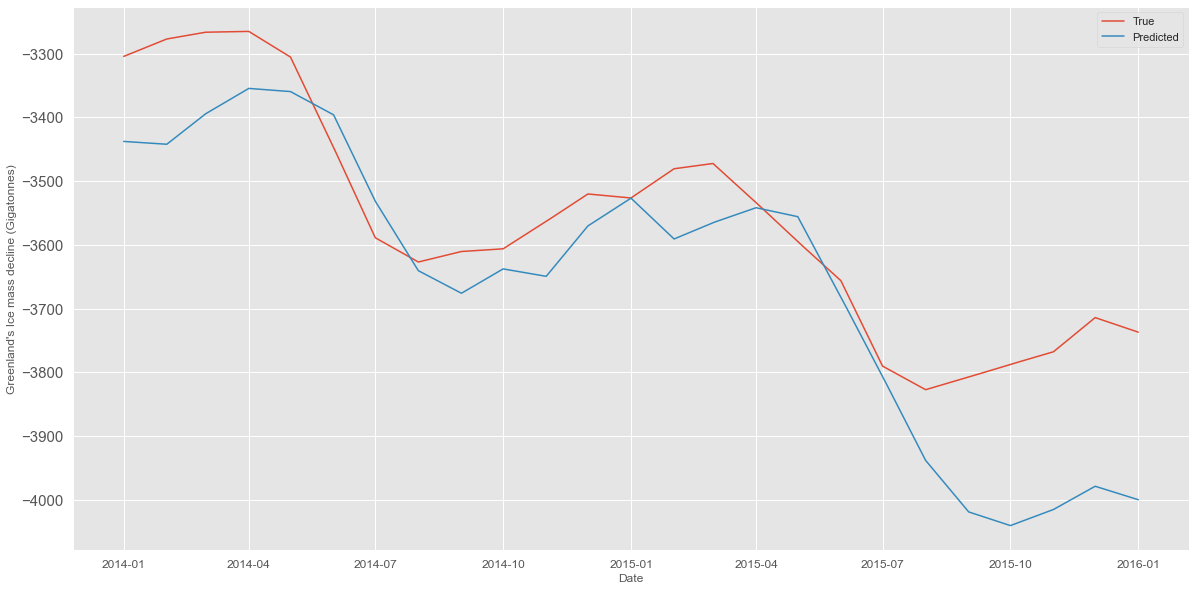

In [71]:
GRIM(LinearRegression())

### Support Vector Regression

Mean Absolute Error:  391.7000603088296
Root Mean Squared Error:  466.7824364473481
Mean Absolute Percentage Error:  11.158692062503988
Accuracy :  88.84130793749601
 
 


NASA - Greenland land ice mass    predicted
Date                                                   
2014-01-01                    -3304.345000 -3283.688337
2014-01-02                    -3303.463226 -3284.904725
2014-01-03                    -3302.581452 -3286.121070
2014-01-04                    -3301.699677 -3287.337440
2014-01-05                    -3300.817903 -3288.553806
2014-01-06                    -3299.936129 -3289.770179
2014-01-07                    -3299.054355 -3290.986534
2014-01-08                    -3298.172581 -3292.202871
2014-01-09                    -3297.290806 -3293.419250
2014-01-10                    -3296.409032 -3294.635591
2014-01-11                    -3295.527258 -3295.851948
2014-01-12                    -3294.645484 -3297.068292
2014-01-13                    -3293.763710 -3298.284683
2014-01-14                    -3292.881935 -3299.500977
2014-01-15                    -3292.000161 -3300.717397
2014-01-16                    -3291.118387 -3301.933779
2014-01-17                    -3290.236613 -3303.150110
2014-01-18                    -3289.354839 -3304.366411
2014-01-19                    -3288.473065 -3305.582830
2014-01-20                    -3287.591290 -3306.799192

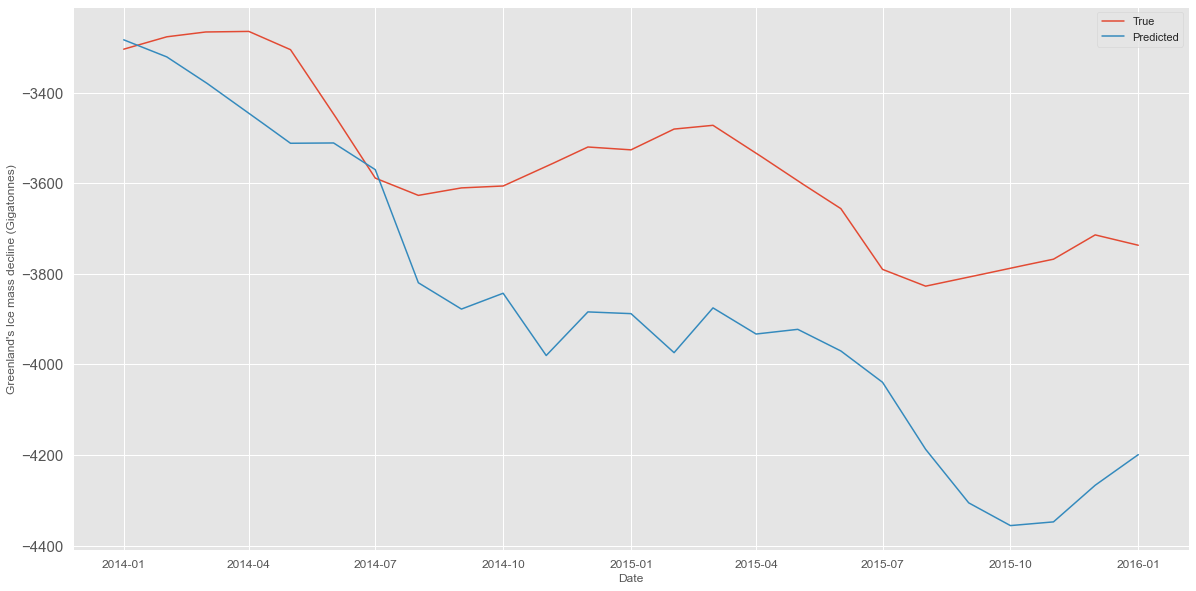

In [72]:
GRIM(SVR(kernel='linear'))

## Prediction of Sea Ice Extent in the Arctic Circle:

### Feature Selection

In [73]:
SIE_X = df[['land_temp', 'ocean_temp', 'air_temp', 'nh_land_temp', 
        'nh_ocean_temp', 'CO2_level', 'SF6_level', 'CH4_level', 'N2O_level',
        'NASA - Greenland land ice mass', 'SOI', 'AOI', 'GBI', 'precip_anomaly',
        'ocean_heat_content', 'CSIRO - Adjusted sea level (inches)']]

SIE_Y = df[['Total']]

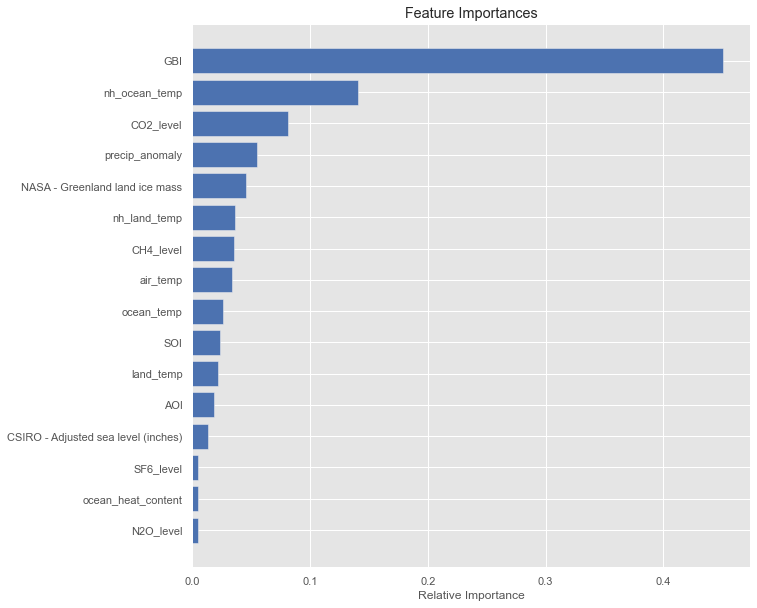

In [74]:
# fitting the model
model = RandomForestRegressor(n_estimators=500, n_jobs=-1, random_state=42)
model.fit(SIE_X, SIE_Y)

# plotting feature importances
features = df.drop(['Seas_of_Japan', 'BeringSea',
       'HudsonBay', 'BaffinBay', 'Greenland_Sea', 'Kara_Barents_Seas',
       'Arctic_Ocean', 'Canadian_Archipelago', 'Gulf_of_Saint_Lawrence',
       'Total'] , axis=1).columns
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [75]:
def sea_ice_extent(regressor):
    
   # Feature Selection:
    
    X = df[['GBI', 'nh_ocean_temp', 'nh_land_temp', 'air_temp','N2O_level', 'CO2_level', 'ocean_heat_content', 'NASA - Greenland land ice mass', 'precip_anomaly', 'SOI', 'AOI']]
    Y = df[['Total']]
    
    # Spliting time series data:
    
    x_train = X[X.index < '2014'].values
    y_train = Y[Y.index < '2014'].values
    x_test = X[X.index >= '2014'].values
    y_test = Y[Y.index >= '2014'].values
    
    # Fitting model:
    
    model = regressor
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    
    #Evaluating performance of the model:
    
    error = abs(y_test - y_pred)
    mae = np.mean(error)                           # Avg(Abs(Actual — Forecast))
    rmse = np.sqrt(np.mean(error**2))              # Sqrt(Avg(Power(Actual - Forecast)))
    mape = np.mean((error / abs(y_test))) * 100    # Avg(Abs(Actual-Forecast)/Abs(Actual)) *100
    accuracy = 100 - mape
    
    print('Mean Absolute Error: ', mae)
    print('Root Mean Squared Error: ', rmse)
    print('Mean Absolute Percentage Error: ', mape)
    print('Accuracy : ', accuracy)

    print(' \n ')
    
    # Dataframe of True values and predicted values:
    
    pred_df = Y[Y.index >= '2014']
    pred_df['predicted'] = y_pred 
    display(pred_df.head(5))
    
    # Plotting true and predicted values:
    
    fig,ax = plt.subplots(figsize=(20,10))
    plt.plot(pred_df)
    ax.set_xlabel("Date", fontsize = 12)
    ax.set_ylabel("Greenland's Ice mass decline (Gigatonnes)", fontsize = 12)
    ax.legend(['True', 'Predicted'])
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 15)
    plt.show()

### Linear Regression

Mean Absolute Error:  711398.7105835516
Root Mean Squared Error:  826165.6382033484
Mean Absolute Percentage Error:  8.0128746597271
Accuracy :  91.9871253402729
 
 


Total     predicted
Date                                  
2014-01-01  1.353346e+07  1.362124e+07
2014-01-02  1.355675e+07  1.360425e+07
2014-01-03  1.358004e+07  1.358725e+07
2014-01-04  1.360333e+07  1.357025e+07
2014-01-05  1.362662e+07  1.355326e+07

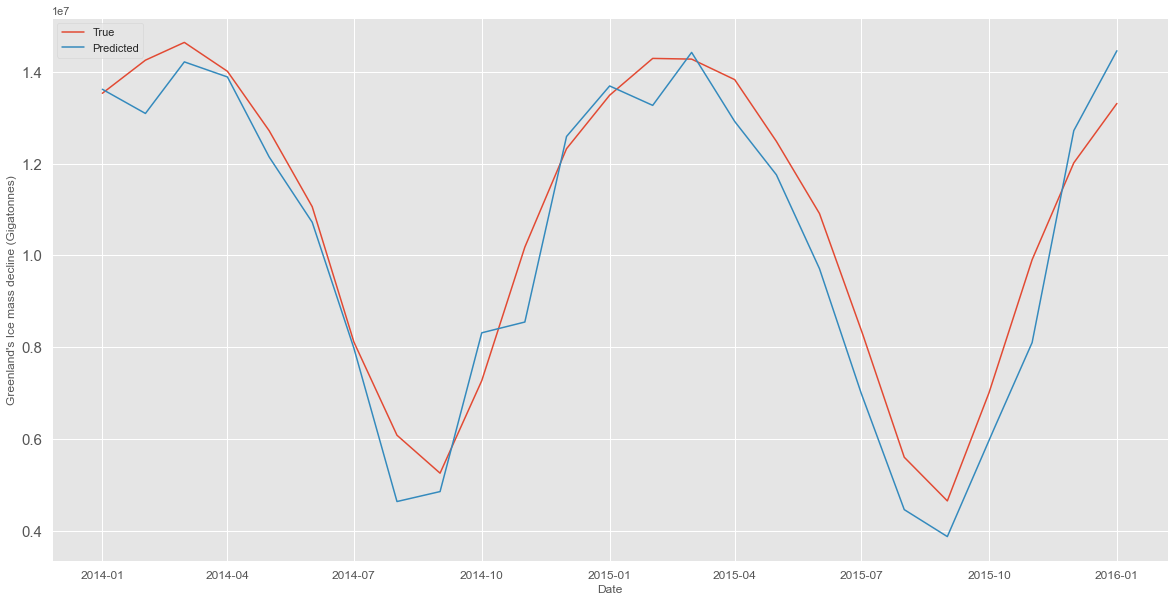

In [76]:
sea_ice_extent(LinearRegression())

### Support Vector Regression

Mean Absolute Error:  3392673.902401613
Root Mean Squared Error:  4143741.6344095105
Mean Absolute Percentage Error:  37.253943835564954
Accuracy :  62.746056164435046
 
 


Total     predicted
Date                                  
2014-01-01  1.353346e+07  1.221869e+07
2014-01-02  1.355675e+07  1.223963e+07
2014-01-03  1.358004e+07  1.226058e+07
2014-01-04  1.360333e+07  1.228153e+07
2014-01-05  1.362662e+07  1.230247e+07

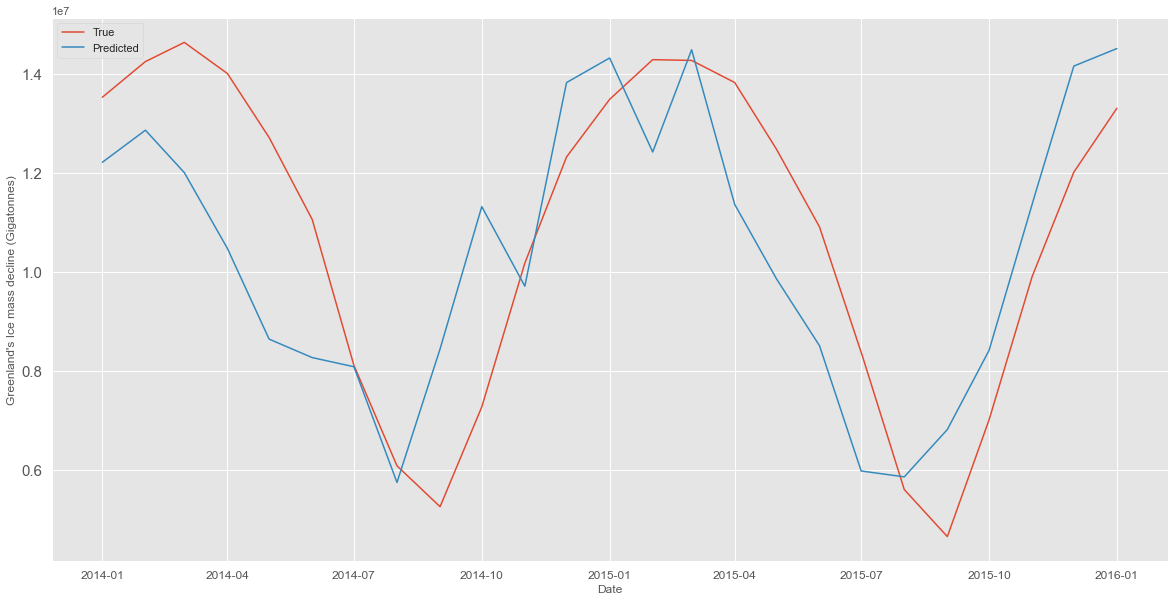

In [77]:
sea_ice_extent(SVR(kernel = 'linear'))

## Prediction of Global Mean Sea Rise Level:

### Feature Selection

In [78]:
GMSL_X = df[['land_temp', 'ocean_temp', 'air_temp', 'nh_land_temp', 'nh_ocean_temp',
       'CO2_level', 'SF6_level', 'CH4_level', 'N2O_level',
       'NASA - Greenland land ice mass', 'Seas_of_Japan', 'BeringSea',
       'HudsonBay', 'BaffinBay', 'Greenland_Sea', 'Kara_Barents_Seas',
       'Arctic_Ocean', 'Canadian_Archipelago', 'Gulf_of_Saint_Lawrence',
       'Total', 'SOI', 'AOI', 'GBI', 'precip_anomaly', 'ocean_heat_content']]

GMSL_Y = df[['CSIRO - Adjusted sea level (inches)']]

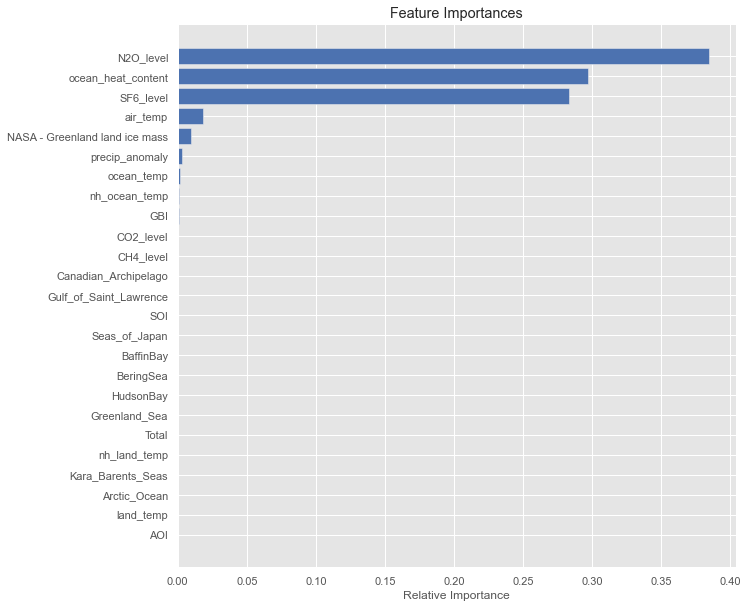

In [79]:
# fitting the model
model = RandomForestRegressor(n_estimators=500, n_jobs=-1, random_state=42)
model.fit(GMSL_X, GMSL_Y)

# plotting feature importances
features = df.drop('CSIRO - Adjusted sea level (inches)', axis=1).columns
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Linear Regression

In [80]:
def GMSL(regressor):
    
    # Feature Selection:
    
    X = df[['air_temp', 'N2O_level', 'SF6_level', 'ocean_heat_content', 'NASA - Greenland land ice mass', 'precip_anomaly']]
    Y = df[['CSIRO - Adjusted sea level (inches)']]
    
    # Spliting time series data:
    
    x_train = X[X.index < '2014'].values
    y_train = Y[Y.index < '2014'].values
    x_test = X[X.index >= '2014'].values
    y_test = Y[Y.index >= '2014'].values
    
    # Fitting model:
    
    model = regressor
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    
    #Evaluating performance of the model:
    
    error = abs(y_test - y_pred)
    mae = np.mean(error)                           # Avg(Abs(Actual — Forecast))
    rmse = np.sqrt(np.mean(error**2))              # Sqrt(Avg(Power(Actual - Forecast)))
    mape = np.mean((error / abs(y_test))) * 100    # Avg(Abs(Actual-Forecast)/Abs(Actual)) *100
    accuracy = 100 - mape
    
    print('Mean Absolute Error: ', mae)
    print('Root Mean Squared Error: ', rmse)
    print('Mean Absolute Percentage Error: ', mape)
    print('Accuracy : ', accuracy)

    print(' \n ')
    
    # Dataframe of True values and predicted values:
    
    pred_df = Y[Y.index >= '2014']
    pred_df['predicted'] = y_pred 
    display(pred_df.head(20))
    
    # Plotting true and predicted values:
    
    fig,ax = plt.subplots(figsize=(20,10))
    plt.plot(pred_df)
    ax.set_xlabel("Date", fontsize = 12)
    ax.set_ylabel("Global Mean Sea Level Rise (Inches)", fontsize = 12)
    ax.legend(['True', 'Predicted'])
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 15)
    plt.show()
    

Mean Absolute Error:  0.10512827584395558
Root Mean Squared Error:  0.11935177506073472
Mean Absolute Percentage Error:  1.1846732485207636
Accuracy :  98.81532675147923
 
 


CSIRO - Adjusted sea level (inches)  predicted
Date                                                      
2014-01-01                             8.579437   8.729868
2014-01-02                             8.580385   8.729610
2014-01-03                             8.581333   8.729353
2014-01-04                             8.582281   8.729095
2014-01-05                             8.583229   8.728838
2014-01-06                             8.584177   8.728580
2014-01-07                             8.585125   8.728323
2014-01-08                             8.586073   8.728065
2014-01-09                             8.587021   8.727807
2014-01-10                             8.587969   8.727550
2014-01-11                             8.588917   8.727292
2014-01-12                             8.589865   8.727035
2014-01-13                             8.590813   8.726777
2014-01-14                             8.591761   8.726520
2014-01-15                             8.592709   8.726262
2014-01-16                             8.593657   8.726005
2014-01-17                             8.594604   8.725747
2014-01-18                             8.595552   8.725490
2014-01-19                             8.596500   8.725232
2014-01-20                             8.597448   8.724974

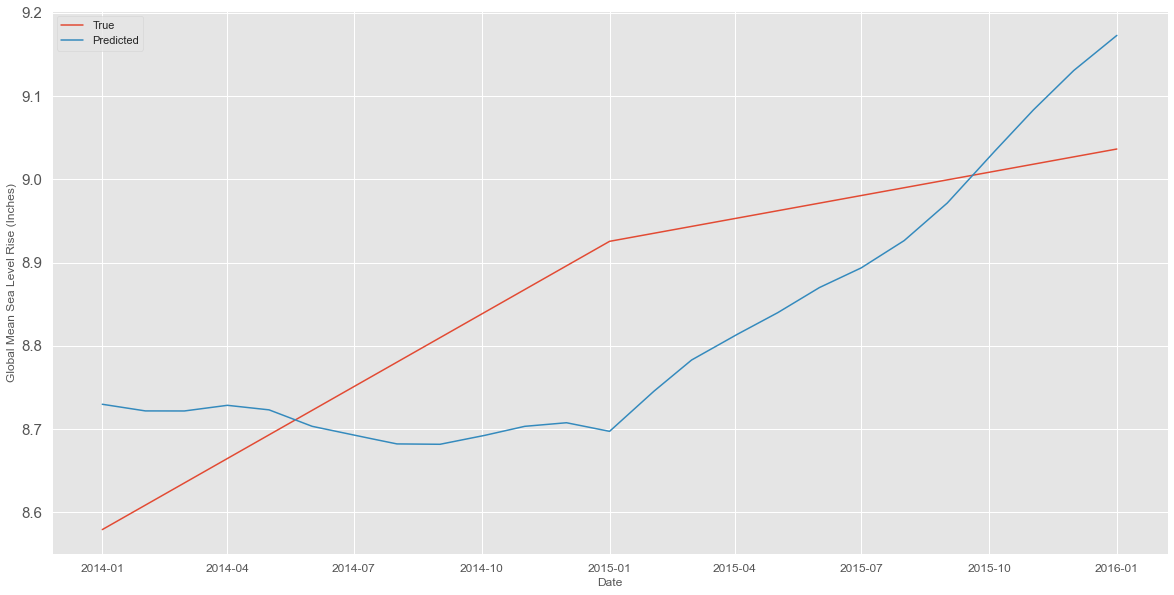

In [81]:
GMSL(LinearRegression())

# SARIMA | SARIMAX Modeling

In [82]:
# SARIMAX model with Exogenous variables:

def predict_exog(data, X, Y, order, seasonal, trend = 'ct', steps = 50):
    
    train = data.iloc[:-50, :]
    test = data.iloc[-50:, :]
    
    # Instantiating model:
    model = SARIMAX(train[X], exog = train[Y], order=order, seasonal_order=seasonal, trend ='ct')

    # Fitting model:
    results = model.fit()

    # Plotting diagnostics:
    results.plot_diagnostics(figsize=(10,10))
    plt.show()
    
    print(' \n ')
    
    # Residuals
    residuals = results.resid
    mae = np.mean(np.abs(residuals))
    print('Mean Absolute error of residuals : ', mae)
    
    print(' \n ')
    
    #Forecasting the ice mass loss values:
    forecast = results.get_forecast(steps=steps, exog= test[Y])

    # forecast mean:
    mean_forecast = forecast.predicted_mean

    # Get confidence intervals of forecasts:
    confidence_intervals = forecast.conf_int()
    
    # Dataframe of actual and forecasted values: 
    df_pred = pd.DataFrame({'actual' : test[X], 'forecast' : mean_forecast})
    display(df_pred.head(10))
    
    print(' \n ')
    
    print('EVALUATION:')
    print(' \n ')
    # accuracy of the model:
    accuracy(df_pred.actual, df_pred.forecast)
    
    # Plot prediction:
    plt.figure(figsize = (15,8))
    plt.plot(data[X], color = 'black')
    plt.plot(mean_forecast.index, mean_forecast.values, color='red',label='forecast')

    # Shade uncertainty area:
    plt.fill_between(mean_forecast.index, confidence_intervals.iloc[:, 0], confidence_intervals.iloc[:, 1], color='pink')
    plt.show()

In [83]:
# SARIMA model with no exogenous variables

def predict_endog(data, X, order, seasonal, trend = 'ct', steps = 50):
    
    train = data.iloc[:-50, :]
    test = data.iloc[-50:, :]
    
    # Instantiating model:
    model = SARIMAX(train[X], order=order, seasonal_order=seasonal, trend ='ct')

    # Fitting model:
    results = model.fit()

    # Plotting diagnostics:
    results.plot_diagnostics(figsize=(10,10))
    plt.show()
    
    # Residuals
    residuals = results.resid
    mae = np.mean(np.abs(residuals))
    print('Mean Absolute error of residuals : ', mae)
    
    print(' \n ')
    
    #Forecasting the ice mass loss values:
    forecast = results.get_forecast(steps=steps)

    # forecast mean:
    mean_forecast = forecast.predicted_mean

    # Get confidence intervals of forecasts:
    confidence_intervals = forecast.conf_int()
    
    # Dataframe of actual and forecasted values: 
    df_pred = pd.DataFrame({'actual' : test[X], 'forecast' : mean_forecast})
    display(df_pred.head(10),df_pred.tail(10))
    
    print(' \n ')
    
    print('EVALUATION:')
    print(' \n ')
    # accuracy of the model:
    accuracy(df_pred.actual, df_pred.forecast)
    
    print(' \n ')
    
    # Plot prediction:
    plt.figure(figsize = (15,8))
    
    plt.plot(data[X], color = 'black')
    plt.plot(mean_forecast.index, mean_forecast.values, color='red',label='forecast')

    # Shade uncertainty area:
    plt.fill_between(mean_forecast.index, confidence_intervals.iloc[:, 0], confidence_intervals.iloc[:, 1], color='pink')
    plt.show()

## Greenland's Ice Mass Extent

### Prediction of Greenland's Ice Mass

In [84]:
# Dependent and exogeneous variables:
df_Grim = ohc_ip.merge(gmsl_ip['CSIRO - Adjusted sea level (inches)'], how = 'inner', on = 'Date').merge(imb['NASA - Greenland land ice mass'], how = 'inner', on ='Date').merge(sf6_level, how = 'inner', on = 'Date')

df_Grim.head()

ocean_heat_content  CSIRO - Adjusted sea level (inches)  \
Date                                                                  
1997-07-01            5.501543                             6.865775   
1997-08-01            5.380091                             6.832672   
1997-09-01            5.258639                             6.799569   
1997-10-01            5.141105                             6.767533   
1997-11-01            5.019653                             6.734430   

            NASA - Greenland land ice mass  SF6_level  
Date                                                   
1997-07-01                      287.698993       4.00  
1997-08-01                      288.530345       4.00  
1997-09-01                      289.361697       4.02  
1997-10-01                      290.193048       4.05  
1997-11-01                      291.024400       4.08

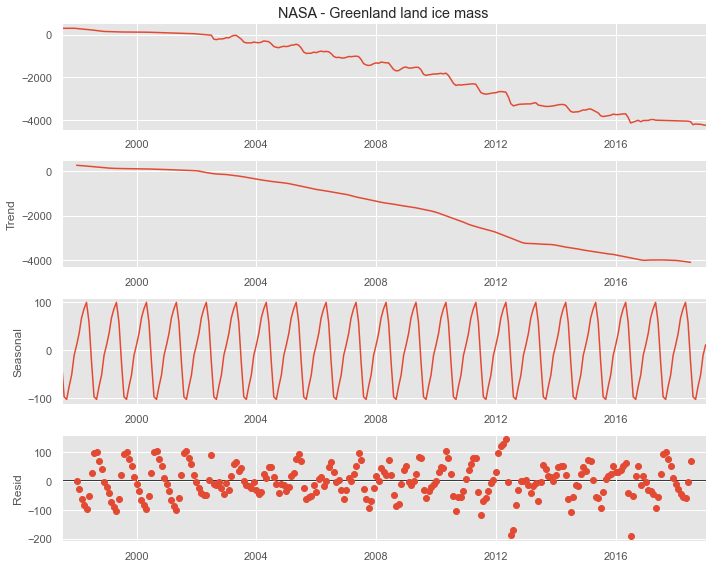

In [85]:
# Trend, Seasonality and residuals:
rcParams['figure.figsize'] = 10, 8
decomposition = sm.tsa.seasonal_decompose(df_Grim['NASA - Greenland land ice mass'], period = 12, model='additive')
figure = decomposition.plot()
plt.show()

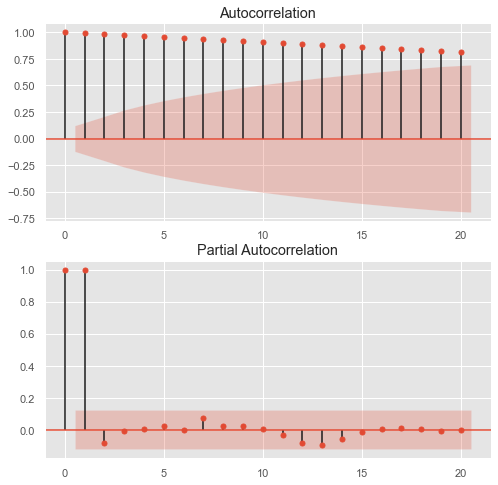

In [86]:
# Autocorrelation and Partial Autocorrelation plots:
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(8,8))

# ACF plot

plot_acf(df_Grim['NASA - Greenland land ice mass'], lags=20, ax=ax1)

# PACF plot

plot_pacf(df_Grim['NASA - Greenland land ice mass'], lags=20, ax=ax2)
plt.show()

In [87]:
# Searching and optimsing hyperparameters:
grim_parameters = pm.auto_arima(df_Grim['NASA - Greenland land ice mass'], exogenous=df_Grim[['ocean_heat_content', 'CSIRO - Adjusted sea level (inches)', 'SF6_level']],
                           start_p=0, start_q=0,
                           max_p=3, max_q=3, m=12,
                           start_P=0, start_Q = 0, seasonal=True,max_P=3, 
                            max_Q=3, d=1, D=1, information_criterion='aic',
                            trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

grim_parameters.summary()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=2613.243, Time=0.25 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=2564.818, Time=0.71 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=2546.178, Time=0.87 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=2596.779, Time=0.26 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=inf, Time=3.10 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=2546.837, Time=3.07 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=2560.009, Time=1.27 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=inf, Time=8.23 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=2562.621, Time=1.14 sec
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=2546.711, Time=0.99 sec
 ARIMA(0,1,2)(0,1,1)[12]             : AIC=2545.589, Time=1.02 sec
 ARIMA(0,1,2)(0,1,0)[12]             : AIC=2595.008, Time=0.31 sec
 ARIMA(0,1,2)(1,1,1)[12]             : AIC=inf, Time=2.31 sec
 ARIMA(0,1,2)(0,1,2)[12]             : AIC=2546.736, Time=3.63 sec
 ARIMA(0,1,2)(1,1,0)[12]          

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  259
Model:             SARIMAX(1, 1, 2)x(0, 1, [1], 12)   Log Likelihood               -1263.923
Date:                              Sun, 06 Jun 2021   AIC                           2543.845
Time:                                      15:02:08   BIC                           2571.888
Sample:                                  07-01-1997   HQIC                          2555.137
                                       - 01-01-2019                                         
Covariance Type:                                opg                                         
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
ocean_heat_content                     20.3205     55.068      0.369      0.712     -87.610     128.251
CSIRO - Adjusted sea level (inches)   -65.6021    135.826     -0.483      0.629    -331.815     200.611
SF6_level                             904.9968    391.615      2.311      0.021     137.446    1672.548
ar.L1                                   0.6335      0.265      2.387      0.017       0.113       1.154
ma.L1                                  -0.3740      0.267     -1.403      0.161      -0.897       0.149
ma.L2                                  -0.3109      0.075     -4.164      0.000      -0.457      -0.165
ma.S.L12                               -0.5341      0.043    -12.343      0.000      -0.619      -0.449
sigma2                               1669.9445     96.481     17.308      0.000    1480.844    1859.045
===================================================================================
Ljung-Box (Q):                       33.84   Jarque-Bera (JB):               219.28
Prob(Q):                              0.74   Prob(JB):                         0.00
Heteroskedasticity (H):               2.88   Skew:                             0.09
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.62
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

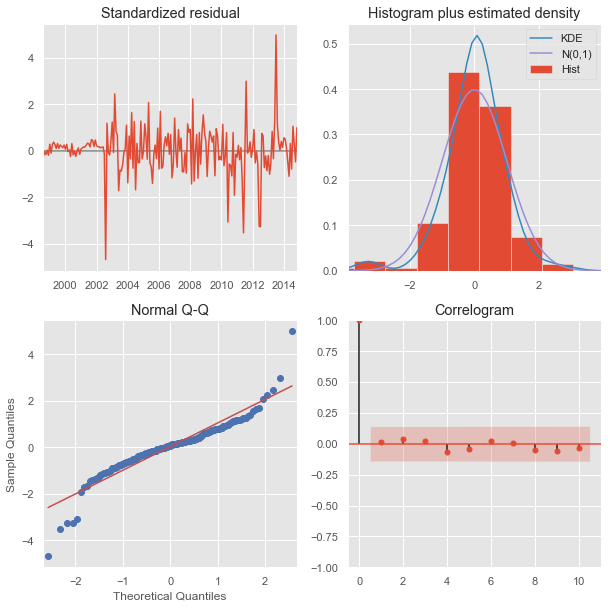

 
 
Mean Absolute error of residuals :  35.50746799700271
 
 


actual     forecast
2014-12-01 -3520.210000 -3529.689808
2015-01-01 -3526.480000 -3521.002199
2015-02-01 -3480.630000 -3506.929823
2015-03-01 -3472.370000 -3505.056096
2015-04-01 -3533.646667 -3509.760722
2015-05-01 -3594.923333 -3534.602187
2015-06-01 -3656.200000 -3682.425668
2015-07-01 -3790.250000 -3827.051923
2015-08-01 -3827.290000 -3889.225030
2015-09-01 -3807.453333 -3894.910030

 
 
EVALUATION:
 
 
Mean Absolute Error:  132.6187149494711
Root Mean Squared Error:  175.4124187656507
Mean Absolute Percentage Error:  3.3085150301748008
Accuracy :  96.6914849698252


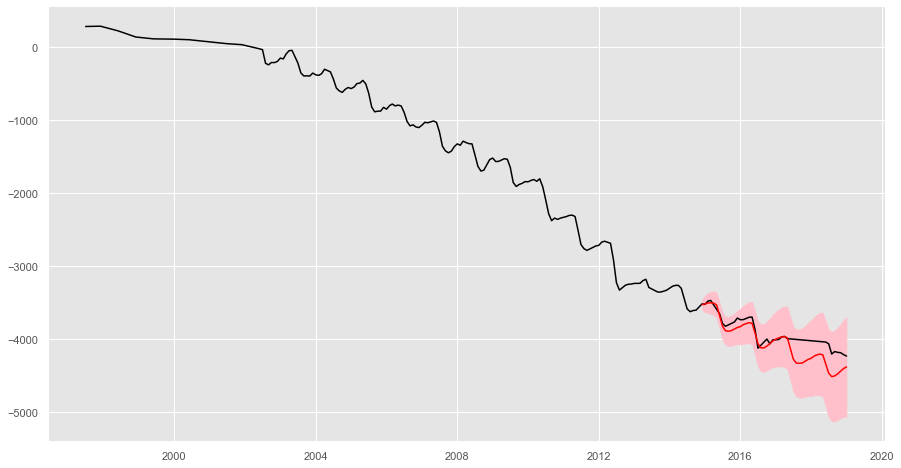

In [88]:
predict_exog(df_Grim, X = 'NASA - Greenland land ice mass' , Y = ['ocean_heat_content', 'CSIRO - Adjusted sea level (inches)', 'SF6_level'], order = (1,1,2), seasonal = (0,1,1,12), trend = 'ct')

### Forecasting till 2030

In [89]:
grim_forecast = imb[['NASA - Greenland land ice mass']]
grim_forecast

NASA - Greenland land ice mass
Date                                      
1992-01-01                      395.365526
1992-02-01                      401.965526
1992-03-01                      408.565526
1992-04-01                      415.165526
1992-05-01                      421.765526
...                                    ...
2020-08-01                    -4928.990000
2020-09-01                    -4922.870000
2020-10-01                    -4900.200000
2020-11-01                    -4839.460000
2020-12-01                    -4901.410000

[348 rows x 1 columns]

In [90]:
grim_parameters1 = pm.auto_arima(grim_forecast['NASA - Greenland land ice mass'],
                           start_p=0, start_q=0,
                           max_p=3, max_q=3, m=12,
                           start_P=0, start_Q = 0, seasonal=True,max_P=3, 
                            max_Q=3, D=1, information_criterion='aic',
                            trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

grim_parameters1.summary()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=3553.318, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=3476.189, Time=0.29 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=3431.578, Time=0.55 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=3524.423, Time=0.09 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=3432.970, Time=1.29 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=3432.769, Time=2.44 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=3470.394, Time=0.27 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=inf, Time=4.00 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=3464.455, Time=0.30 sec
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=3433.054, Time=0.89 sec
 ARIMA(0,1,2)(0,1,1)[12]             : AIC=3432.731, Time=0.81 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=3440.768, Time=0.49 sec
 ARIMA(1,1,2)(0,1,1)[12]             : AIC=3431.735, Time=1.80 sec
 ARIMA(0,1,1)(0,1,1)[12] intercept   : AIC=3433.060, Time=1.00 sec

Best model:  ARIMA(0,1,

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  348
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood               -1712.789
Date:                            Sun, 06 Jun 2021   AIC                           3431.578
Time:                                    15:02:27   BIC                           3443.020
Sample:                                         0   HQIC                          3436.140
                                            - 348                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.3584      0.037      9.653      0.000       0.286       0.431
ma.S.L12      -0.6210      0.029    -21.181      0.000      -0.679      -0.564
sigma2      1587.5198     69.600     22.809      0.000    1451.106    1723.933
===================================================================================
Ljung-Box (Q):                       47.80   Jarque-Bera (JB):               327.70
Prob(Q):                              0.19   Prob(JB):                         0.00
Heteroskedasticity (H):              64.95   Skew:                            -0.23
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.82
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

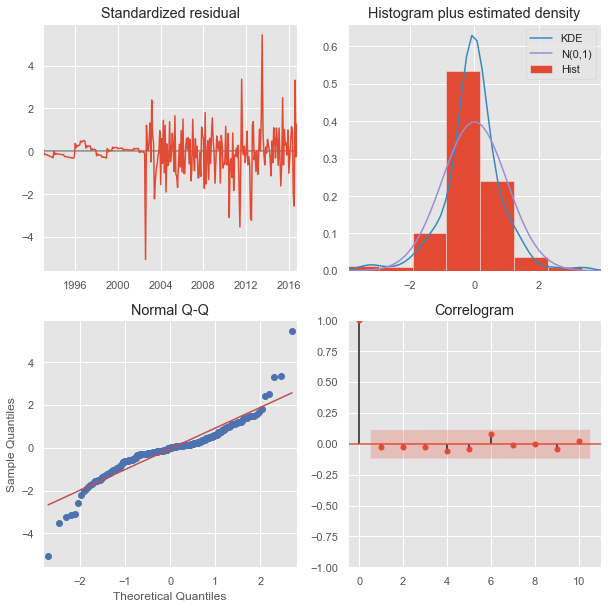

Mean Absolute error of residuals :  36.64020002239937
 
 


actual     forecast
2016-11-01 -4068.100 -3969.835898
2016-12-01 -4014.220 -3938.767740
2017-01-01 -4011.495 -3953.971561
2017-02-01 -4008.770 -3942.799393
2017-03-01 -3973.480 -3936.884093
2017-04-01 -3965.870 -3949.214873
2017-05-01 -3996.930 -3974.271251
2017-06-01 -4000.520 -4118.334299
2017-07-01 -4004.110 -4320.769974
2017-08-01 -4007.700 -4330.863843

actual     forecast
2030-03-01     NaN -9134.903820
2030-04-01     NaN -9163.841485
2030-05-01     NaN -9205.775422
2030-06-01     NaN -9365.375467
2030-07-01     NaN -9580.496908
2030-08-01     NaN -9607.387597
2030-09-01     NaN -9605.351966
2030-10-01     NaN -9600.609863
2030-11-01     NaN -9595.345968
2030-12-01     NaN -9581.676250

 
 
EVALUATION:
 
 
Mean Absolute Error:  236.14196278071083
Root Mean Squared Error:  268.8881670024533
Mean Absolute Percentage Error:  5.44203696156608
Accuracy :  94.55796303843393
 
 


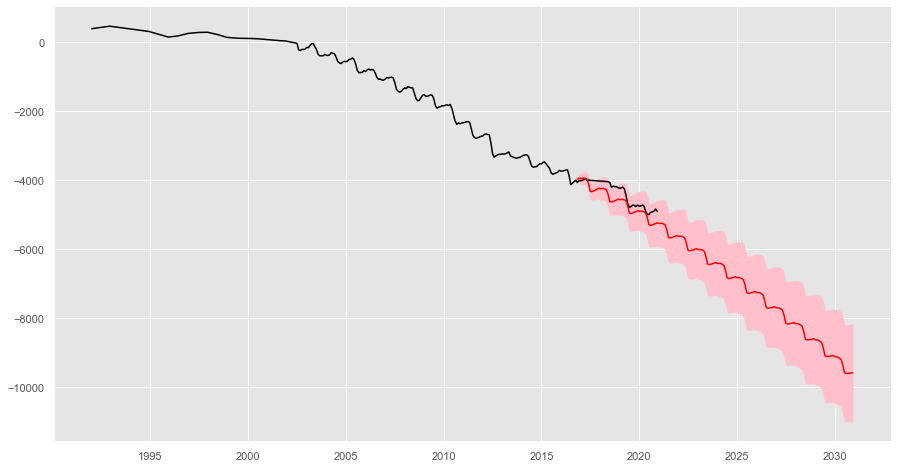

In [91]:
predict_endog(grim_forecast, X = 'NASA - Greenland land ice mass' , order = (1,0,2), seasonal = (1,1,2,12), trend = 'ct', steps = 170)

## Arctic Sea Ice Extent

### Total Arctic Sea Ice

In [92]:
ASI = sea_ice[['Total']].merge(nh_ocean_temp, how = 'inner', on = 'Date', ) \
        .merge(co2_level, how = 'inner', on = 'Date') \
        .merge(ch4_level, how = 'inner', on = 'Date') \
        .merge(imb['NASA - Greenland land ice mass'], how = 'inner', on = 'Date') \
        .merge(ohc_ip, how = 'inner', on = 'Date') \
        .merge(nh_land_temp, how = 'inner', on = 'Date') \
        .merge(air_temp, how = 'inner', on = 'Date')
ASI

Total  nh_ocean_temp  CO2_level  CH4_level  \
Date                                                        
1992-01-01  14553699           0.17     356.25     1739.4   
1992-02-01  15357879           0.20     357.11     1737.8   
1992-03-01  15374343           0.29     357.86     1737.1   
1992-04-01  14597985           0.20     359.09     1736.7   
1992-05-01  13241816           0.23     359.59     1734.8   
...              ...            ...        ...        ...   
2015-09-01   4651525           1.13     397.63     1836.0   
2015-10-01   7009832           1.09     398.29     1841.3   
2015-11-01   9907267           1.10     400.16     1844.8   
2015-12-01  12018238           1.00     401.85     1845.0   
2016-01-01  13311743           1.10     402.56     1842.7   

            NASA - Greenland land ice mass  ocean_heat_content  nh_land_temp  \
Date                                                                           
1992-01-01                      395.365526            2.580667          1.23   
1992-02-01                      401.965526            2.612005          0.92   
1992-03-01                      408.565526            2.641322          0.72   
1992-04-01                      415.165526            2.672661          0.12   
1992-05-01                      421.765526            2.702989          0.15   
...                                    ...                 ...           ...   
2015-09-01                    -3807.453333           16.104293          1.34   
2015-10-01                    -3787.616667           16.131901          1.42   
2015-11-01                    -3767.780000           16.160430          1.45   
2015-12-01                    -3714.170000           16.188038          2.21   
2016-01-01                    -3737.010000           16.216567          1.86   

            air_temp  
Date                  
1992-01-01  0.230000  
1992-02-01  0.230847  
1992-03-01  0.231639  
1992-04-01  0.232486  
1992-05-01  0.233306  
...              ...  
2015-09-01  0.949890  
2015-10-01  0.959753  
2015-11-01  0.969945  
2015-12-01  0.979808  
2016-01-01  0.990000  

[289 rows x 8 columns]

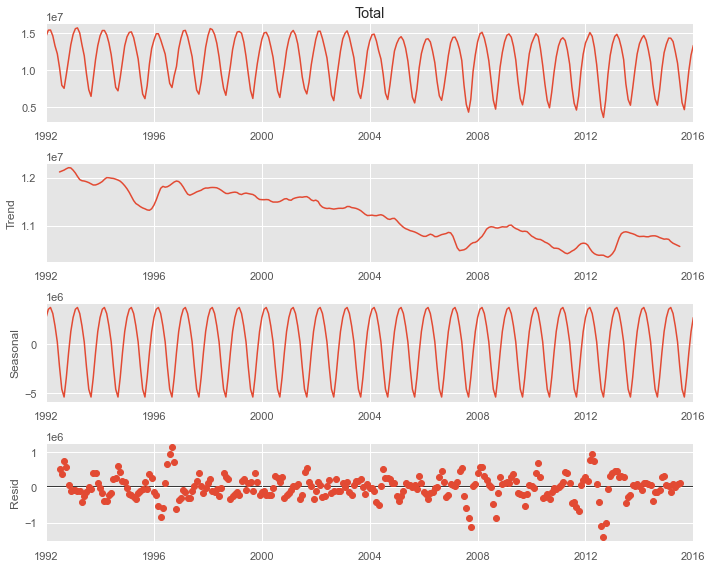

In [93]:
rcParams['figure.figsize'] = 10,8
decomposition = sm.tsa.seasonal_decompose(ASI['Total'], period = 12, model='additive')
figure = decomposition.plot()
plt.show()

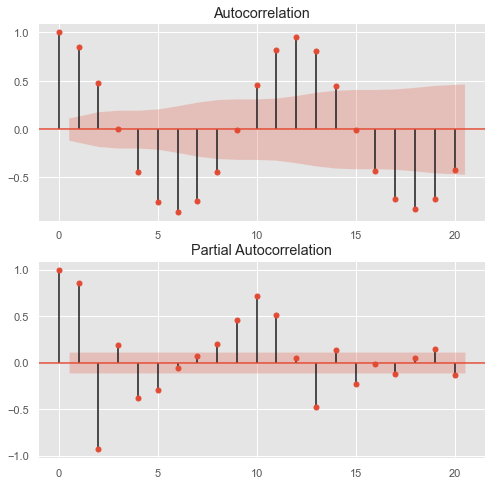

In [94]:
# Autocorrelation and Partial Autocorrelation plots:
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(8,8))

# ACF plot

plot_acf(ASI['Total'], lags=20, ax=ax1)

# PACF plot

plot_pacf(ASI['Total'], lags=20, ax=ax2)
plt.show()

In [95]:
ASI_parameters = pm.auto_arima(ASI['Total'], exogenous=ASI[['nh_ocean_temp', 'CO2_level', 'CH4_level',
                'ocean_heat_content']],
                           start_p=0, start_q=0,
                           max_p=3, max_q=3, m=12,
                           start_P=0, start_Q = 0, seasonal=True,max_P=3, 
                            max_Q=3, d=1, D=1, information_criterion='aic',
                            trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

ASI_parameters.summary()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=9134.945, Time=0.06 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=7860.530, Time=1.02 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=7860.487, Time=2.73 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=7860.734, Time=0.38 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=7851.330, Time=2.01 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=7860.568, Time=0.54 sec
 ARIMA(0,1,1)(2,1,1)[12]             : AIC=7853.036, Time=7.20 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=7853.048, Time=8.18 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=7860.771, Time=3.89 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=7861.153, Time=2.65 sec
 ARIMA(0,1,1)(2,1,2)[12]             : AIC=7855.329, Time=5.48 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=7861.721, Time=1.38 sec
 ARIMA(1,1,1)(1,1,1)[12]             : AIC=7852.844, Time=3.92 sec
 ARIMA(0,1,2)(1,1,1)[12]             : AIC=7851.228, Time=2.45 sec
 ARIMA(0,1,2)(0,1,1

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  289
Model:             SARIMAX(0, 1, 2)x(1, 1, [1], 12)   Log Likelihood               -3916.614
Date:                              Sun, 06 Jun 2021   AIC                           7851.228
Time:                                      15:04:13   BIC                           7883.812
Sample:                                  01-01-1992   HQIC                          7864.304
                                       - 01-01-2016                                         
Covariance Type:                                opg                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
nh_ocean_temp      -4.273e+05   3.31e+05     -1.292      0.196   -1.08e+06    2.21e+05
CO2_level            1.69e+04   4.89e+04      0.345      0.730    -7.9e+04    1.13e+05
CH4_level          -9741.7941   1.12e+04     -0.867      0.386   -3.18e+04    1.23e+04
ocean_heat_content -3.438e+04   3.56e+05     -0.097      0.923   -7.31e+05    6.63e+05
ma.L1                 -0.0061      0.053     -0.116      0.908      -0.110       0.098
ma.L2                 -0.0200      0.016     -1.242      0.214      -0.052       0.012
ar.S.L12               0.7302      0.086      8.459      0.000       0.561       0.899
ma.S.L12              -0.8498      0.073    -11.696      0.000      -0.992      -0.707
sigma2              1.196e+11      3.108   3.85e+10      0.000     1.2e+11     1.2e+11
===================================================================================
Ljung-Box (Q):                      158.29   Jarque-Bera (JB):                52.84
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.87   Skew:                             0.10
Prob(H) (two-sided):                  0.52   Kurtosis:                         5.13
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.46e+25. Standard errors may be unstable.
"""

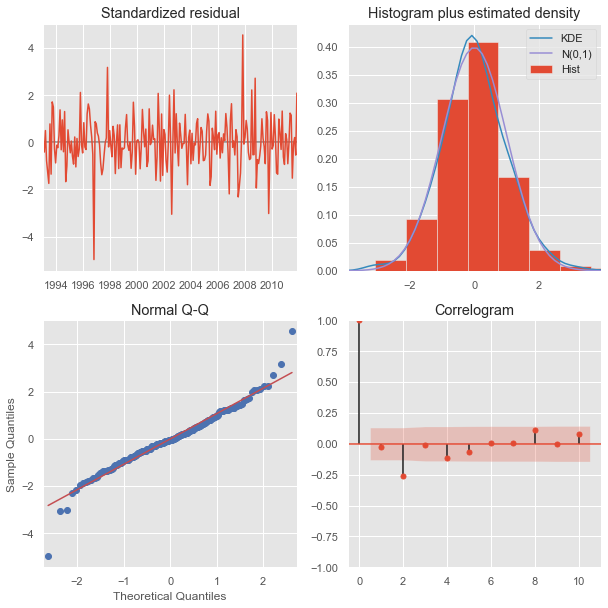

 
 
Mean Absolute error of residuals :  609440.3572876645
 
 


actual      forecast
2011-12-01  12126399  1.189969e+07
2012-01-01  13626196  1.339604e+07
2012-02-01  14335928  1.419831e+07
2012-03-01  15034254  1.447494e+07
2012-04-01  14524883  1.409082e+07
2012-05-01  13032080  1.284313e+07
2012-06-01  10706707  1.093726e+07
2012-07-01   7676069  7.861204e+06
2012-08-01   4727452  5.620872e+06
2012-09-01   3604452  4.692218e+06

 
 
EVALUATION:
 
 
Mean Absolute Error:  329219.29013801174
Root Mean Squared Error:  422156.1160781915
Mean Absolute Percentage Error:  4.401834044216575
Accuracy :  95.59816595578343


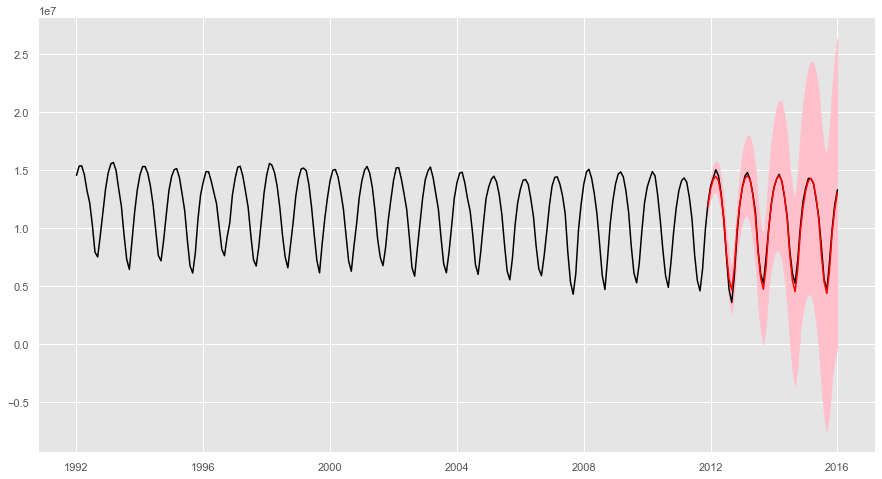

In [96]:
predict_exog(ASI, X = 'Total' , Y = ['nh_ocean_temp', 'CO2_level','CH4_level',
       'ocean_heat_content'], 
        order = (2,1,2), seasonal = (1,1,1,12), trend = 'ct')

### Forecasting till 2030

#### Total Arctic Sea Ice

In [97]:
TAI = sea_ice[['Total']]
TAI

Total
Date                
1978-11-01  11698504
1978-12-01  13639870
1979-01-01  15171993
1979-02-01  15828204
1979-03-01  16053921
...              ...
2017-08-01   5485364
2017-09-01   4859250
2017-10-01   6807251
2017-11-01   9554231
2017-12-01  11722580

[470 rows x 1 columns]

In [98]:
TAI_parameters = pm.auto_arima(TAI['Total'],
                           start_p=0, start_q=0,
                           max_p=3, max_q=3, m=12,
                           start_P=0, start_Q = 0, seasonal=True,max_P=3, 
                            max_Q=3, d= None, D=1, information_criterion='aic',
                            trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

TAI_parameters.summary()

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=13204.474, Time=0.13 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=13097.801, Time=1.37 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=13086.278, Time=0.77 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=13208.960, Time=0.02 sec
 ARIMA(0,0,1)(0,1,0)[12] intercept   : AIC=13111.084, Time=0.11 sec
 ARIMA(0,0,1)(1,1,1)[12] intercept   : AIC=13088.277, Time=1.44 sec
 ARIMA(0,0,1)(0,1,2)[12] intercept   : AIC=13088.263, Time=3.42 sec
 ARIMA(0,0,1)(1,1,0)[12] intercept   : AIC=13086.367, Time=0.54 sec
 ARIMA(0,0,1)(1,1,2)[12] intercept   : AIC=13090.127, Time=6.11 sec
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=13197.989, Time=0.37 sec
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=13106.163, Time=1.16 sec
 ARIMA(0,0,2)(0,1,1)[12] intercept   : AIC=13089.347, Time=0.98 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=13097.675, Time=0.92 sec
 ARIMA(1,0,2)(0,1,1)[12] intercept   : AIC=13106.213, Time=1.97 sec
 ARIM

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  470
Model:             SARIMAX(0, 0, 1)x(0, 1, 1, 12)   Log Likelihood               -6539.139
Date:                            Sun, 06 Jun 2021   AIC                          13086.278
Time:                                    15:04:40   BIC                          13102.786
Sample:                                         0   HQIC                         13092.780
                                            - 470                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept  -3.445e+04   2.18e+04     -1.579      0.114   -7.72e+04    8299.191
ma.L1          0.3741      0.009     43.732      0.000       0.357       0.391
ma.S.L12      -0.0554      0.004    -12.437      0.000      -0.064      -0.047
sigma2      1.255e+11      0.010   1.29e+13      0.000    1.25e+11    1.25e+11
===================================================================================
Ljung-Box (Q):                      271.79   Jarque-Bera (JB):               637.37
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.90   Skew:                            -0.41
Prob(H) (two-sided):                  0.52   Kurtosis:                         8.72
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 5.45e+28. Standard errors may be unstable.
"""

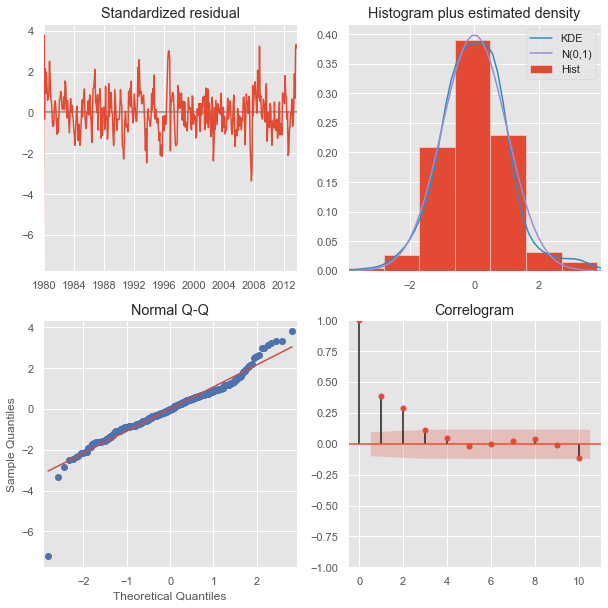

Mean Absolute error of residuals :  547491.913496991
 
 


actual      forecast
2013-11-01   9996759.0  9.838224e+06
2013-12-01  12154932.0  1.192992e+07
2014-01-01  13533464.0  1.349528e+07
2014-02-01  14255444.0  1.446082e+07
2014-03-01  14642447.0  1.476854e+07
2014-04-01  14012814.0  1.413748e+07
2014-05-01  12720073.0  1.297076e+07
2014-06-01  11062697.0  1.131193e+07
2014-07-01   8113202.0  8.069545e+06
2014-08-01   6082652.0  5.908458e+06

actual      forecast
2027-03-01     NaN  1.421785e+07
2027-04-01     NaN  1.358628e+07
2027-05-01     NaN  1.241906e+07
2027-06-01     NaN  1.075972e+07
2027-07-01     NaN  7.516827e+06
2027-08-01     NaN  5.355233e+06
2027-09-01     NaN  4.564724e+06
2027-10-01     NaN  6.812023e+06
2027-11-01     NaN  9.221943e+06
2027-12-01     NaN  1.133523e+07

 
 
EVALUATION:
 
 
Mean Absolute Error:  314524.5742756737
Root Mean Squared Error:  396396.2625261282
Mean Absolute Percentage Error:  3.503997327351043
Accuracy :  96.49600267264896
 
 


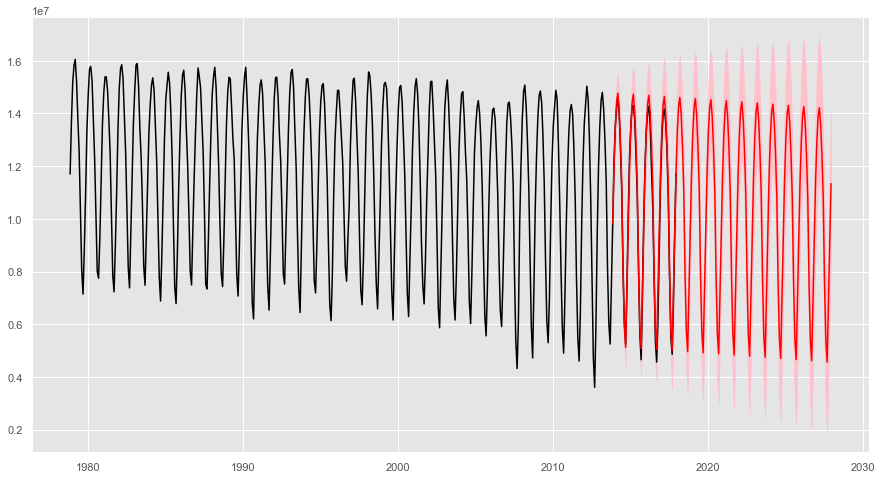

In [99]:
predict_endog(TAI, X = 'Total' , order = (0,0,1), seasonal = (0,1,1,12), trend = 'ct', steps = 170)

#### Arctic Ocean

In [100]:
arctic_ocean= sea_ice[['Arctic_Ocean']]
arctic_ocean

Arctic_Ocean
Date                    
1978-11-01       7057024
1978-12-01       7152365
1979-01-01       7158168
1979-02-01       7158209
1979-03-01       7158209
...                  ...
2017-08-01       4530328
2017-09-01       4110596
2017-10-01       5356851
2017-11-01       6502654
2017-12-01       6978535

[470 rows x 1 columns]

In [101]:
arctic_parameters = pm.auto_arima(arctic_ocean,
                           start_p=0, start_q=0,
                           max_p=3, max_q=3, m=12,
                           start_P=0, start_Q = 0, seasonal=True,max_P=3, 
                            max_Q=3, d= None, D=1, information_criterion='aic',
                            trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

arctic_parameters.summary()

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=12817.818, Time=0.03 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=12684.801, Time=0.78 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=12666.892, Time=0.84 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=12817.265, Time=0.03 sec
 ARIMA(0,0,1)(0,1,0)[12] intercept   : AIC=12693.566, Time=0.22 sec
 ARIMA(0,0,1)(1,1,1)[12] intercept   : AIC=12668.664, Time=1.61 sec
 ARIMA(0,0,1)(0,1,2)[12] intercept   : AIC=12668.703, Time=3.84 sec
 ARIMA(0,0,1)(1,1,0)[12] intercept   : AIC=12666.677, Time=0.67 sec
 ARIMA(0,0,1)(2,1,0)[12] intercept   : AIC=12668.668, Time=3.38 sec
 ARIMA(0,0,1)(2,1,1)[12] intercept   : AIC=12670.609, Time=3.86 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=12812.823, Time=0.91 sec
 ARIMA(1,0,1)(1,1,0)[12] intercept   : AIC=12699.585, Time=1.02 sec
 ARIMA(0,0,2)(1,1,0)[12] intercept   : AIC=12676.625, Time=0.71 sec
 ARIMA(1,0,2)(1,1,0)[12] intercept   : AIC=12699.757, Time=1.52 sec
 ARIM

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  470
Model:             SARIMAX(0, 0, 1)x(1, 1, [], 12)   Log Likelihood               -6329.426
Date:                             Sun, 06 Jun 2021   AIC                          12664.852
Time:                                     15:05:16   BIC                          12677.233
Sample:                                          0   HQIC                         12669.729
                                             - 470                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.4120      0.008     53.209      0.000       0.397       0.427
ar.S.L12      -0.0705      0.004    -15.896      0.000      -0.079      -0.062
sigma2      5.201e+10   1.54e-14   3.39e+24      0.000     5.2e+10     5.2e+10
===================================================================================
Ljung-Box (Q):                      318.38   Jarque-Bera (JB):              1430.09
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.40   Skew:                            -0.40
Prob(H) (two-sided):                  0.04   Kurtosis:                        11.62
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 9.07e+38. Standard errors may be unstable.
"""

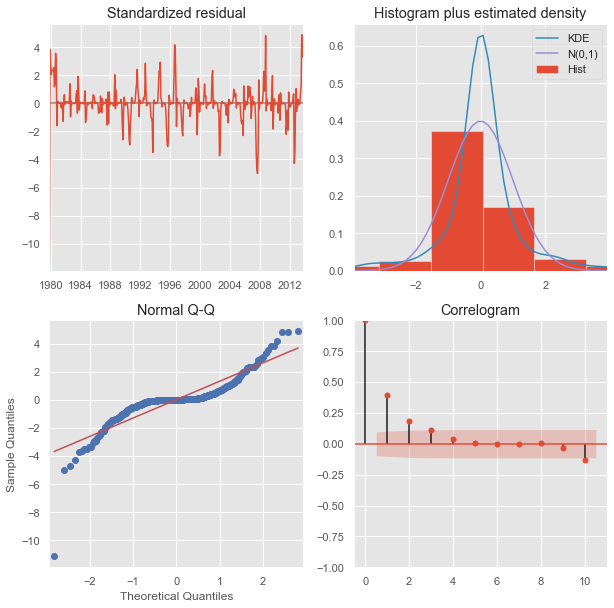

Mean Absolute error of residuals :  247729.99741325024
 
 


actual      forecast
2013-11-01  6877829.0  7.334668e+06
2013-12-01  7098111.0  7.255097e+06
2014-01-01  7123036.0  7.115783e+06
2014-02-01  7104443.0  7.141406e+06
2014-03-01  7143322.0  7.157505e+06
2014-04-01  7158209.0  7.157994e+06
2014-05-01  7113092.0  7.125450e+06
2014-06-01  6796466.0  6.972969e+06
2014-07-01  6012626.0  6.206640e+06
2014-08-01  4839134.0  4.902230e+06

actual      forecast
2027-03-01     NaN  7.212817e+06
2027-04-01     NaN  7.213282e+06
2027-05-01     NaN  7.180957e+06
2027-06-01     NaN  7.029355e+06
2027-07-01     NaN  6.263345e+06
2027-08-01     NaN  4.966609e+06
2027-09-01     NaN  4.341373e+06
2027-10-01     NaN  5.863222e+06
2027-11-01     NaN  7.351307e+06
2027-12-01     NaN  7.300880e+06

 
 
EVALUATION:
 
 
Mean Absolute Error:  220887.77385652752
Root Mean Squared Error:  323712.87316801405
Mean Absolute Percentage Error:  3.903041353238143
Accuracy :  96.09695864676186
 
 


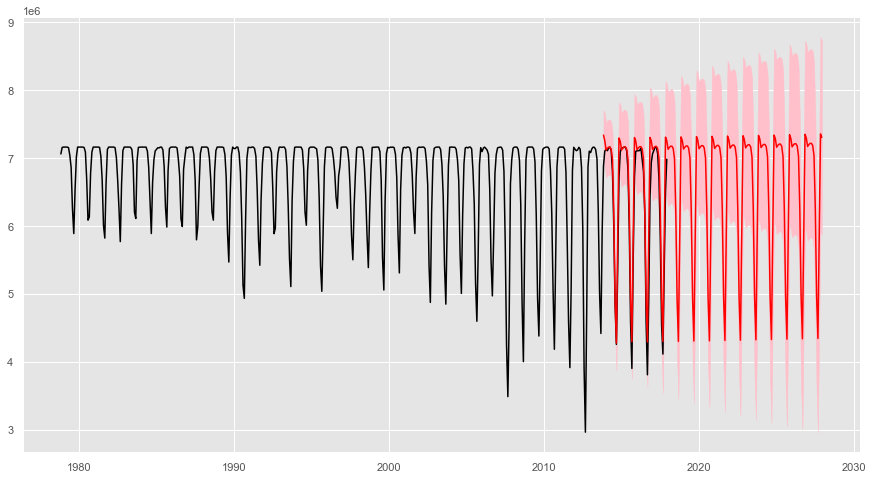

In [102]:
predict_endog(arctic_ocean, X = 'Arctic_Ocean' , order = (1,0,2), seasonal = (1,1,2,12), trend = 'ct', steps = 170)

#### Greenland Sea

In [103]:
greenland_sea= sea_ice[['Greenland_Sea']]
greenland_sea

Greenland_Sea
Date                     
1978-11-01         658919
1978-12-01         912035
1979-01-01        1085606
1979-02-01        1115438
1979-03-01        1048558
...                   ...
2017-08-01         190754
2017-09-01         141630
2017-10-01         237248
2017-11-01         412044
2017-12-01         540062

[470 rows x 1 columns]

In [104]:
gsea_parameters = pm.auto_arima(greenland_sea['Greenland_Sea'],
                           start_p=0, start_q=0,
                           max_p=3, max_q=3, m=12,
                           start_P=0, start_Q = 0, seasonal=True,max_P=3, 
                            max_Q=3, d= None, D=1, information_criterion='aic',
                            trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

gsea_parameters.summary()

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=11880.103, Time=0.04 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=11460.714, Time=0.53 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=11579.937, Time=0.54 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=11879.859, Time=0.03 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=11539.728, Time=0.09 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=11447.266, Time=2.79 sec
 ARIMA(1,0,0)(3,1,0)[12] intercept   : AIC=11436.720, Time=4.63 sec
 ARIMA(1,0,0)(3,1,1)[12] intercept   : AIC=11400.360, Time=9.01 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=11402.647, Time=4.85 sec
 ARIMA(1,0,0)(3,1,2)[12] intercept   : AIC=11402.360, Time=13.91 sec
 ARIMA(1,0,0)(2,1,2)[12] intercept   : AIC=inf, Time=4.60 sec
 ARIMA(0,0,0)(3,1,1)[12] intercept   : AIC=11848.912, Time=8.76 sec
 ARIMA(2,0,0)(3,1,1)[12] intercept   : AIC=11389.539, Time=11.02 sec
 ARIMA(2,0,0)(2,1,1)[12] intercept   : AIC=11392.722, Time=6.03 sec
 ARIMA(2,

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  470
Model:             SARIMAX(2, 0, 0)x(3, 1, [1], 12)   Log Likelihood               -5685.505
Date:                              Sun, 06 Jun 2021   AIC                          11385.010
Time:                                      15:12:22   BIC                          11413.898
Sample:                                           0   HQIC                         11396.388
                                              - 470                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9512      0.057     16.717      0.000       0.840       1.063
ar.L2         -0.1402      0.059     -2.395      0.017      -0.255      -0.025
ar.S.L12       0.1417      0.068      2.080      0.038       0.008       0.275
ar.S.L24       0.0321      0.055      0.583      0.560      -0.076       0.140
ar.S.L36      -0.0986      0.057     -1.720      0.085      -0.211       0.014
ma.S.L12      -0.8843      0.060    -14.769      0.000      -1.002      -0.767
sigma2      4.446e+09   4.61e-12   9.64e+20      0.000    4.45e+09    4.45e+09
===================================================================================
Ljung-Box (Q):                       68.06   Jarque-Bera (JB):                44.92
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.28   Skew:                             0.17
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.49
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 5.5e+36. Standard errors may be unstable.
"""

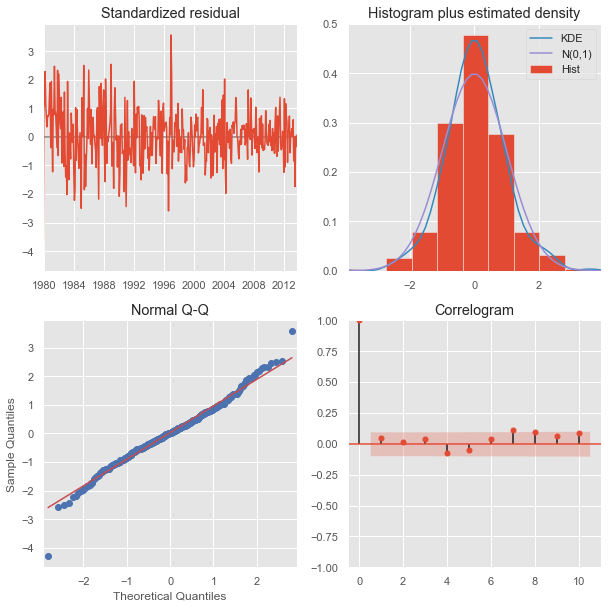

Mean Absolute error of residuals :  53176.70622779371
 
 


actual       forecast
2013-11-01  564071.0  466010.858145
2013-12-01  659783.0  563445.195259
2014-01-01  628946.0  609244.899424
2014-02-01  641796.0  674647.052986
2014-03-01  675422.0  700432.421396
2014-04-01  722202.0  742005.871973
2014-05-01  723265.0  695729.545993
2014-06-01  632255.0  646686.702891
2014-07-01  416180.0  394229.775788
2014-08-01  265576.0  239654.871211

actual       forecast
2027-03-01     NaN  539045.284795
2027-04-01     NaN  580117.012074
2027-05-01     NaN  534098.171418
2027-06-01     NaN  489472.867744
2027-07-01     NaN  237327.139816
2027-08-01     NaN   80528.534658
2027-09-01     NaN   56706.567700
2027-10-01     NaN  201951.919817
2027-11-01     NaN  312534.910867
2027-12-01     NaN  407263.478602

 
 
EVALUATION:
 
 
Mean Absolute Error:  42987.352332657465
Root Mean Squared Error:  54402.2482556281
Mean Absolute Percentage Error:  9.807501341847072
Accuracy :  90.19249865815293
 
 


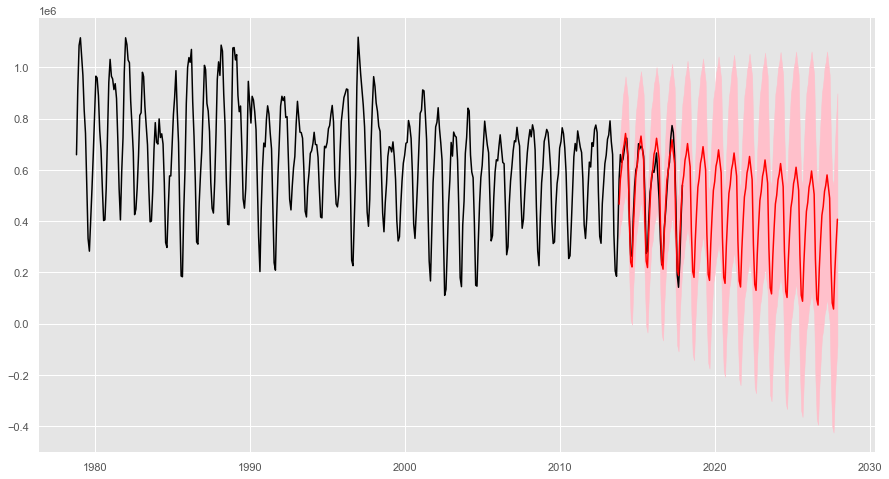

In [105]:
predict_endog(greenland_sea, X = 'Greenland_Sea' , order = (3,0,0), seasonal = (3,1,0,12), trend = 'ct', steps = 170)

## Global Mean Sea Level Rise

### Prediction of Mean sea level rise

In [106]:
mean_sea_level = ohc_ip.merge(gmsl_ip['CSIRO - Adjusted sea level (inches)'], how = 'inner', on = 'Date') \
                .merge(imb['NASA - Greenland land ice mass'], how = 'inner', on ='Date') \
                .merge(sf6_level, how = 'inner', on = 'Date') \
                .merge(n2o_level, how = 'inner', on = 'Date') \
                .merge(air_temp, how = 'inner', on = 'Date')
mean_sea_level

ocean_heat_content  CSIRO - Adjusted sea level (inches)  \
Date                                                                  
2001-01-01            5.370667                             7.271654   
2001-02-01            5.409735                             7.279679   
2001-03-01            5.445023                             7.286927   
2001-04-01            5.484091                             7.294952   
2001-05-01            5.521900                             7.302718   
...                        ...                                  ...   
2015-09-01           16.104293                             8.999202   
2015-10-01           16.131901                             9.008309   
2015-11-01           16.160430                             9.017720   
2015-12-01           16.188038                             9.026827   
2016-01-01           16.216567                             9.036237   

            NASA - Greenland land ice mass  SF6_level  N2O_level  air_temp  
Date                                                                        
2001-01-01                       76.576115       4.69      316.3  0.550000  
2001-02-01                       72.106299       4.71      316.3  0.556795  
2001-03-01                       67.636483       4.73      316.2  0.562932  
2001-04-01                       63.166667       4.75      316.1  0.569726  
2001-05-01                       58.696850       4.76      316.1  0.576301  
...                                    ...        ...        ...       ...  
2015-09-01                    -3807.453333       8.63      328.2  0.949890  
2015-10-01                    -3787.616667       8.67      328.4  0.959753  
2015-11-01                    -3767.780000       8.71      328.6  0.969945  
2015-12-01                    -3714.170000       8.74      328.8  0.979808  
2016-01-01                    -3737.010000       8.77      328.9  0.990000  

[181 rows x 6 columns]

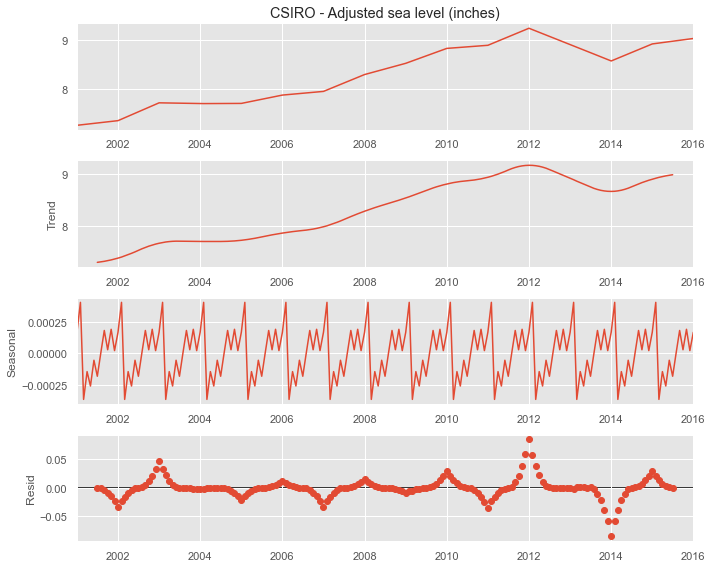

In [107]:
rcParams['figure.figsize'] = 10,8
decomposition = sm.tsa.seasonal_decompose(mean_sea_level['CSIRO - Adjusted sea level (inches)'], period = 12, model='additive')
figure = decomposition.plot()
plt.show()

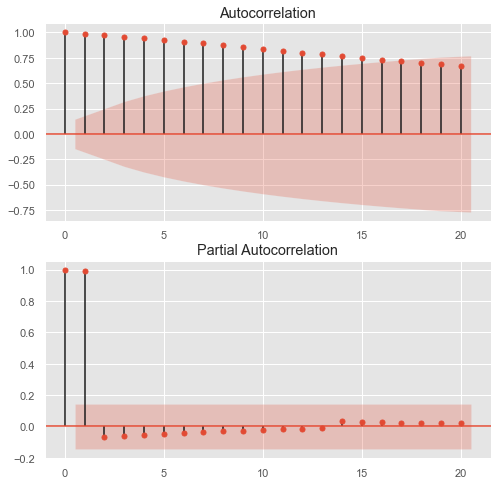

In [108]:
# Autocorrelation and Partial Autocorrelation plots:
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(8,8))

# ACF plot

plot_acf(mean_sea_level['CSIRO - Adjusted sea level (inches)'], lags=20, ax=ax1)

# PACF plot

plot_pacf(mean_sea_level['CSIRO - Adjusted sea level (inches)'], lags=20, ax=ax2)
plt.show()

In [109]:
sea_level_parameters = pm.auto_arima(mean_sea_level['CSIRO - Adjusted sea level (inches)'],
                        exogenous=mean_sea_level[[ 
                                       'NASA - Greenland land ice mass',
                                        'N2O_level', 'air_temp']],
                           start_p=0, start_q=0,
                           max_p=3, max_q=3, m=12,
                           start_P=0, start_Q = 0, seasonal=True,max_P=3, 
                            max_Q=3, d=None, D=1, information_criterion='aic',
                            trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

sea_level_parameters.summary()

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=-89.155, Time=0.28 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=-664.312, Time=1.68 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=-298.933, Time=2.36 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=-86.950, Time=0.55 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=-690.655, Time=0.38 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=-688.655, Time=0.77 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=-655.766, Time=0.90 sec
 ARIMA(2,0,0)(0,1,0)[12] intercept   : AIC=-822.903, Time=0.21 sec
 ARIMA(2,0,0)(1,1,0)[12] intercept   : AIC=-942.507, Time=2.96 sec
 ARIMA(2,0,0)(2,1,0)[12] intercept   : AIC=-933.427, Time=14.01 sec
 ARIMA(2,0,0)(1,1,1)[12] intercept   : AIC=-938.340, Time=7.35 sec
 ARIMA(2,0,0)(0,1,1)[12] intercept   : AIC=-820.903, Time=0.63 sec
 ARIMA(2,0,0)(2,1,1)[12] intercept   : AIC=-931.791, Time=12.18 sec
 ARIMA(3,0,0)(1,1,0)[12] intercept   : AIC=-819.009, Time=1.72 sec
 ARIMA(2,0,1)(1,1,0

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  181
Model:             SARIMAX(2, 0, 0)x(1, 1, 0, 12)   Log Likelihood                 508.659
Date:                            Sun, 06 Jun 2021   AIC                          -1003.319
Time:                                    15:14:08   BIC                           -981.410
Sample:                                01-01-2001   HQIC                          -994.428
                                     - 01-01-2016                                         
Covariance Type:                              opg                                         
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
NASA - Greenland land ice mass -3.147e-05   2.11e-05     -1.493      0.135   -7.28e-05    9.83e-06
N2O_level                          0.0255      0.011      2.309      0.021       0.004       0.047
air_temp                          -0.2669      0.175     -1.525      0.127      -0.610       0.076
ar.L1                              1.7886      0.046     38.656      0.000       1.698       1.879
ar.L2                             -0.8132      0.048    -17.079      0.000      -0.907      -0.720
ar.S.L12                          -0.5311      0.037    -14.209      0.000      -0.604      -0.458
sigma2                             0.0001   1.04e-05     12.836      0.000       0.000       0.000
===================================================================================
Ljung-Box (Q):                       98.96   Jarque-Bera (JB):               638.90
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               3.41   Skew:                             0.11
Prob(H) (two-sided):                  0.00   Kurtosis:                        12.52
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

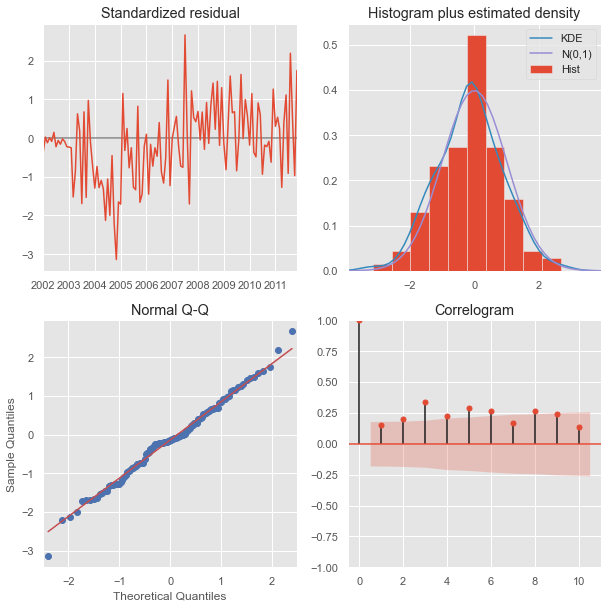

 
 
Mean Absolute error of residuals :  3.1053994006583485
 
 


actual  forecast
2011-12-01  9.214669  9.228898
2012-01-01  9.244094  9.250776
2012-02-01  9.216084  9.262852
2012-03-01  9.189880  9.259723
2012-04-01  9.161869  9.229619
2012-05-01  9.134762  9.226994
2012-06-01  9.106751  9.228379
2012-07-01  9.079644  9.230196
2012-08-01  9.051633  9.222672
2012-09-01  9.023622  9.201162

 
 
EVALUATION:
 
 
Mean Absolute Error:  0.49843724299311326
Root Mean Squared Error:  0.5625926899120924
Mean Absolute Percentage Error:  5.64870019777378
Accuracy :  94.35129980222622


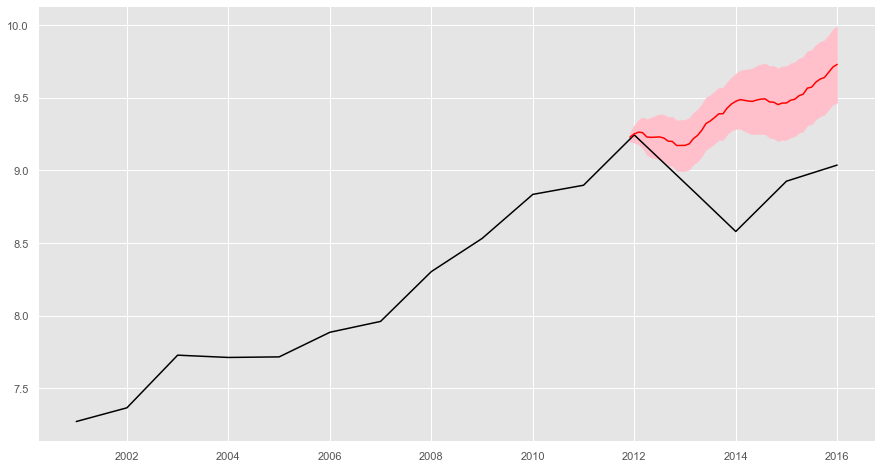

In [110]:
predict_exog(mean_sea_level, X = 'CSIRO - Adjusted sea level (inches)' , 
                             Y = [ 
                               'NASA - Greenland land ice mass',
                               'N2O_level', 'air_temp'], 
        order = (2,0,0), seasonal = (1,1,3,12), trend = 'ct')

### Forecasting till 2030

In [111]:
mean_sea = gmsl[['CSIRO - Adjusted sea level (inches)']]
mean_sea

CSIRO - Adjusted sea level (inches)
Date                                           
1880-01-01                             0.000000
1881-01-01                             0.220472
1882-01-01                            -0.440945
1883-01-01                            -0.232283
1884-01-01                             0.590551
...                                         ...
2015-01-01                             8.925435
2016-01-01                             9.036237
2017-01-01                             9.087686
2018-01-01                             9.221200
2019-01-01                             9.479331

[140 rows x 1 columns]

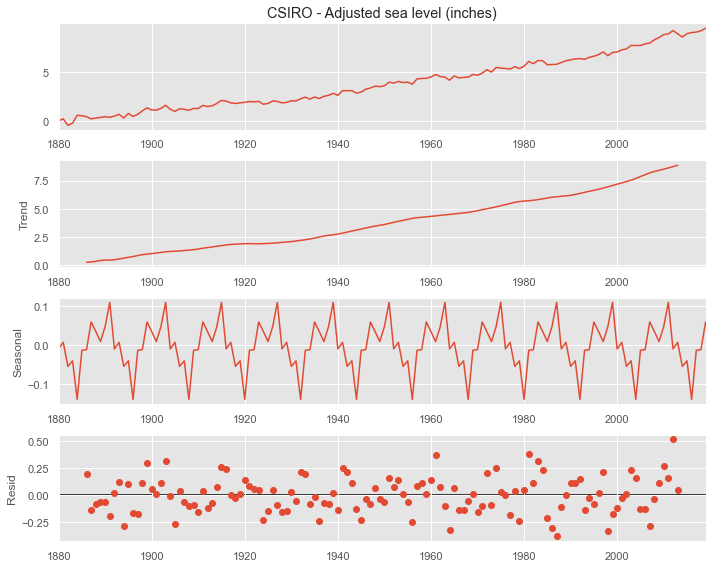

In [112]:
rcParams['figure.figsize'] = 10, 8
decomposition = sm.tsa.seasonal_decompose(mean_sea['CSIRO - Adjusted sea level (inches)'], period = 12, model='additive')
figure = decomposition.plot()
plt.show()

In [113]:
mean_sea_parameters = pm.auto_arima(mean_sea['CSIRO - Adjusted sea level (inches)'],
                           start_p=0, start_q=0,
                           max_p=3, max_q=3, m=12,
                           start_P=0, start_Q = 0, seasonal=True,max_P=3, 
                            max_Q=3, d= None, D=1, information_criterion='aic',
                            trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

mean_sea_parameters.summary()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=52.777, Time=0.07 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=30.641, Time=0.21 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.68 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=44.713, Time=0.03 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=18.222, Time=0.66 sec
 ARIMA(1,1,0)(3,1,0)[12]             : AIC=12.598, Time=1.40 sec
 ARIMA(1,1,0)(3,1,1)[12]             : AIC=inf, Time=6.97 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=2.38 sec
 ARIMA(0,1,0)(3,1,0)[12]             : AIC=20.133, Time=1.27 sec
 ARIMA(2,1,0)(3,1,0)[12]             : AIC=9.229, Time=1.61 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=15.281, Time=0.84 sec
 ARIMA(2,1,0)(3,1,1)[12]             : AIC=inf, Time=7.62 sec
 ARIMA(2,1,0)(2,1,1)[12]             : AIC=inf, Time=4.46 sec
 ARIMA(3,1,0)(3,1,0)[12]             : AIC=9.398, Time=2.17 sec
 ARIMA(2,1,1)(3,1,0)[12]             : AIC=8.653, Time=5.34 sec


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  140
Model:             SARIMAX(0, 1, 2)x(2, 1, [1], 12)   Log Likelihood                   4.700
Date:                              Sun, 06 Jun 2021   AIC                              2.601
Time:                                      15:16:55   BIC                             19.666
Sample:                                           0   HQIC                             9.534
                                              - 140                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3407      0.089     -3.808      0.000      -0.516      -0.165
ma.L2         -0.1583      0.085     -1.854      0.064      -0.326       0.009
ar.S.L12       0.0211      0.151      0.140      0.889      -0.274       0.316
ar.S.L24      -0.1720      0.120     -1.440      0.150      -0.406       0.062
ma.S.L12      -0.8387      0.185     -4.521      0.000      -1.202      -0.475
sigma2         0.0473      0.007      6.891      0.000       0.034       0.061
===================================================================================
Ljung-Box (Q):                       26.07   Jarque-Bera (JB):                 1.94
Prob(Q):                              0.96   Prob(JB):                         0.38
Heteroskedasticity (H):               1.02   Skew:                            -0.25
Prob(H) (two-sided):                  0.95   Kurtosis:                         3.35
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

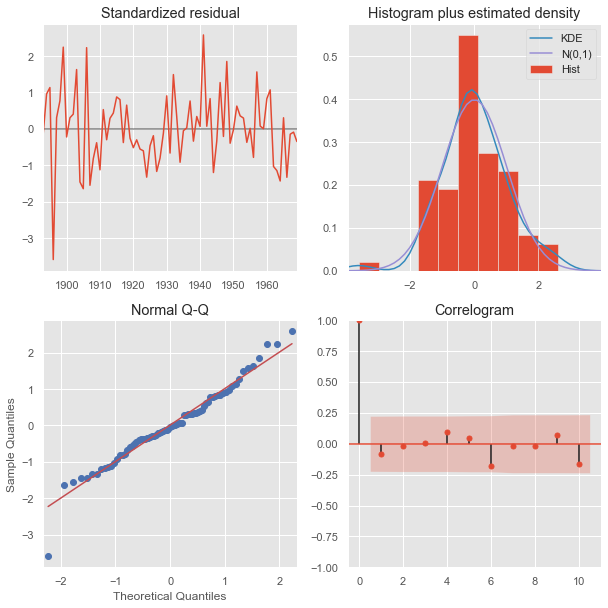

Mean Absolute error of residuals :  0.18498342340738355
 
 


actual  forecast
1970-01-01  4.677165  4.794728
1971-01-01  4.881890  4.935218
1972-01-01  5.240157  4.991782
1973-01-01  5.003937  5.183720
1974-01-01  5.472441  5.154089
1975-01-01  5.409449  5.279529
1976-01-01  5.370079  5.055023
1977-01-01  5.303150  5.470800
1978-01-01  5.555118  5.363915
1979-01-01  5.362205  5.406783

actual   forecast
2091-01-01     NaN  19.261248
2092-01-01     NaN  19.487866
2093-01-01     NaN  19.769040
2094-01-01     NaN  19.832991
2095-01-01     NaN  20.074215
2096-01-01     NaN  19.971445
2097-01-01     NaN  20.472511
2098-01-01     NaN  20.459169
2099-01-01     NaN  20.630046
2100-01-01     NaN  20.674001

 
 
EVALUATION:
 
 
Mean Absolute Error:  0.27234107195995655
Root Mean Squared Error:  0.333560433652075
Mean Absolute Percentage Error:  3.881955108845218
Accuracy :  96.11804489115478
 
 


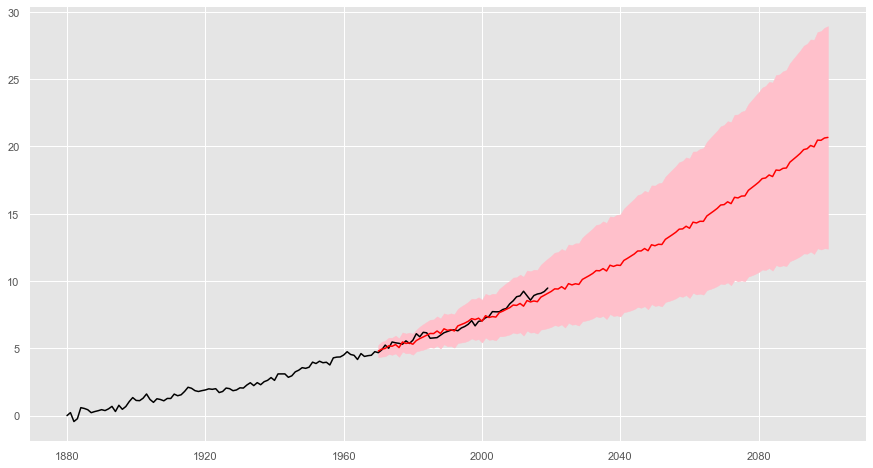

In [114]:
predict_endog(mean_sea, X = 'CSIRO - Adjusted sea level (inches)' , order = (0,1,2), seasonal = (2,1,0,12), trend = 'ct', steps = 131)